In [1]:
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay

In [81]:
def no_aim(arr):
    counter = 0
    for a in arr[:10]:
        if a == 0 or a == -1:
            counter += 1
    
    if counter == 10:
        return True
    
    return False

In [82]:
def check_editors(arr):
    if arr[10] == 19473 and arr[11] == 0:
        return False
    
    return True

In [83]:
journal_info = pd.read_csv('doaj_journal_list_urls_from_doaj_bing_v1.csv')

In [84]:
journal_info['ISSN'] = journal_info['ISSN'].apply(str.strip)

In [85]:
journal_info

,Unnamed: 0,Journal_Title_Normalized,added,Journal Title,ISSN,Remove_Date,Add_Date,Reason,Data Source,URL,reason_category
0,0,"#tear: revista de educação, ciência e tecnologia",True,"#Tear: Revista de Educação, Ciência e Tecnologia",2238-8079,1677-09-22,2015-07-20,Still in DOAJ index,DOAJ,https://periodicos.ifrs.edu.br/index.php/tear/...,interesting reason
1,1,(en)clave comahue,True,(En)clave Comahue,2545-6466,1677-09-22,2019-05-13,Still in DOAJ index,DOAJ,http://revele.uncoma.edu.ar/htdoc/revele/index...,interesting reason
2,2,(پژوهش حسابداری و حسابرسی (پیوسته,True,(پژوهش حسابداری و حسابرسی (پیوسته,2676-7554,1677-09-22,2020-05-25,Still in DOAJ index,DOAJ,https://ijar.alzahra.ac.ir/,interesting reason
3,3,100-cs,True,100-Cs,0719-5737,1677-09-22,2018-12-27,Still in DOAJ index,DOAJ,http://100cs.cl/,interesting reason
4,4,1616,True,1616,0210-7287,1677-09-22,2020-03-09,Still in DOAJ index,DOAJ,http://revistas.usal.es/index.php/1616_Anuario...,interesting reason
...,...,...,...,...,...,...,...,...,...,...,...
15421,15436,силовое и энергетическое оборудование: автоном...,False,Силовое и энергетическое оборудование: Автоном...,2618-8716,2020-11-19,1677-09-22,Website URLs have security issues,DOAJ,https://onlinebooks.library.upenn.edu/webbin/b...,interesting reason
15422,15437,українська біографістика,False,Українська біографістика,2520-2855,2021-02-11,1677-09-22,Journal not adhering to best practice,DOAJ,http://ub.nbuv.gov.ua/,interesting reason
15423,15438,экономика региона,False,Экономика региона,2072-6414,2021-03-01,1677-09-22,Journal not adhering to Best practice,DOAJ,https://economyofregion.ru/,interesting reason
15424,15439,اندیشه‌های نوین تربیتی,False,اندیشه‌های نوین تربیتی,2476-7654,2022-06-09,1677-09-22,Journal not adhering to Best practice,DOAJ,http://ensani.ir/fa/article/journal/65/%D8%A7%...,interesting reason


In [122]:
web_features1 = []
web_features0 = []
tmp = []

journal_issns0 = []
journal_issns1 = []

for batch in range(0,100):
    with open('./labeled_journal_feature_2022/web_content_features_1_'+str(batch)+'.pkl', 'rb') as f:
        web_features1 += pickle.load(f)
        
journal_issns1 += journal_info[journal_info['Reason']!='Still in DOAJ index']['ISSN'].tolist()
print(len(web_features1),len(journal_issns1))    
    
for batch in range(0,100):
    with open('./labeled_journal_feature_2022/web_content_features_0_'+str(batch)+'.pkl', 'rb') as f:
        web_features0 += pickle.load(f)
        
journal_issns0 += journal_info[journal_info['Reason']=='Still in DOAJ index']['ISSN'].tolist()
print(len(web_features0),len(journal_issns0))   

#print('content feature')
#print(web_features1)
#print(web_features0)
#print(len(web_features1))
#print(len(web_features0))


web_not_working = [ind for ind,ft in enumerate(web_features1) if ft[0] =='Empty']
web_not_english = [ind for ind,ft in enumerate(web_features1) if ft[0] =='Non-EN']
web_not = [ind for ind,ft in enumerate(web_features1) if len(ft) <=9]
#print(web_features1[1])
web_features_1 = [ft for ft in web_features1 if len(ft) >9]

journal_issns_1 = [journal_issns1[ind] for ind,ft in enumerate(web_features1) if len(ft) >9]

web_features_1b = [ft for ft in web_features1 if len(ft) >9]

print(len(web_features_1),len(journal_issns_1))  

unwhite_tb = pd.DataFrame(web_features_1)
unwhite_tb['label'] = 1

#print(web_features0)
web_not_working2 = [ind for ind,ft in enumerate(web_features0) if ft[0] =='Empty']
web_not_english2 = [ind for ind,ft in enumerate(web_features0) if ft[0] =='Non-EN']

web_features_0 = [ft for ft in web_features0 if len(ft) >9]

journal_issns_0 = [journal_issns0[ind] for ind,ft in enumerate(web_features0) if len(ft) >9]


web_features_0b = [ft for ft in web_features0 if len(ft) >9 ]

print(len(web_features_0),len(journal_issns_0)) 

white_tb = pd.DataFrame(web_features_0)
white_tb['label'] = 0

#print(len(web_features1))
#print(len(web_features0))

all_tb = pd.concat([unwhite_tb,white_tb]).reset_index(drop=True)

X1 = all_tb.loc[:, all_tb.columns != 'label']
y1 = all_tb.loc[:, all_tb.columns == 'label']

2567 2567
12859 12859
2009 2009
8720 8720


In [121]:
X1[3]

0       22.7
1        0.0
2        0.0
3       21.5
4        0.0
        ... 
2491     0.0
2492     0.0
2493    18.9
2494     0.0
2495    17.8
Name: 2, Length: 2496, dtype: float64

In [87]:
len(X1)

10729

In [88]:
check_aim(web_features1[2])

True

In [89]:
web_features_1

[[-18.71,
  23.4,
  0.0,
  23.8,
  14.21,
  28.0,
  35,
  25.25,
  22.69,
  6.51,
  19473,
  0,
  -1,
  1,
  1,
  1,
  -1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19473, 0, -1, -1, -1, -1, -1],
 [-1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  8745.833333333334,
  31,
  -1,
  -1,
  1,
  -1,
  -1],
 [29.52,
  11.1,
  0.0,
  26.75,
  17.85,
  20.3,
  6,
  5.0,
  13.2,
  0.84,
  19473,
  0,
  1,
  1,
  1,
  1,
  -1],
 [-284.02,
  61.2,
  22.7,
  81.04,
  16.02,
  92.3,
  56,
  22.5,
  21.76,
  40.35,
  19473,
  3,
  1,
  1,
  1,
  1,
  -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 5405.5, 12, 1, 1, 1, 1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 19473, 2, -1, -1, 1, 1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 19473, 0, 1, 1, 1, 1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 19473, 0, -1, -1, 1, 1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 8590.0, 6, 1, 1, 1, 1, -1],
 [-1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  8167.555555555556,
  78,
  -1,
  -1,


In [90]:
X1.shape,len(web_features1+web_features0),len(web_features_1b+web_features_0b)

((10729, 17), 15426, 10729)

In [91]:
max(np.array(web_features_1)[:,10])

19473.0

In [92]:
min(np.array(web_features_1)[:,11])

0.0

In [93]:
min(np.array(web_features_1)[:,0]),max(np.array(web_features_1)[:,0])

(-388.67, 206.84)

In [94]:
len(np.where(np.array(web_features_1)[:,0]<-1)[0])

126

In [95]:
len(web_features_1)

2009

In [96]:
web_features_1[123]

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 19473, 0, -1, -1, -1, -1, -1]

In [97]:
journal_issns_1.index('0215-0883')

ValueError: '0215-0883' is not in list

In [98]:
journal_info[journal_info['ISSN']=='2414-6994']

,Unnamed: 0,Journal_Title_Normalized,added,Journal Title,ISSN,Remove_Date,Add_Date,Reason,Data Source,URL,reason_category
19,19,aaou journal,True,AAOU Journal,2414-6994,1677-09-22,2018-12-04,Still in DOAJ index,DOAJ,http://www.emeraldgrouppublishing.com/services...,interesting reason


In [99]:
with open('key_pages.pkl', 'rb') as f:
    check = pickle.load(f)


In [100]:
check

{'about': [0, 'http://ojs.latrobe.edu.au/#'],
 'ethics policy': [14,
  'https://ojs.latrobe.edu.au/ojs/index.php/tlg/information/authors'],
 'latest': [1, 'https://ojs.latrobe.edu.au/ojs/index.php/tlg/issue/current'],
 'paper': [0, 'https://ojs.latrobe.edu.au/ojs/index.php/tlg/issue/archive']}

In [101]:
tmp = [ft for ft in web_features0 if len(ft)>8]

In [102]:
journal_issns0_tmp = [journal_issns0[ind] for ind,ft in enumerate(web_features0) if len(ft)>8]

In [103]:
np.where(np.array(tmp)[:,11]==0)[0][:10]

array([ 4,  5,  8, 12, 16, 17, 18, 20, 21, 23])

In [104]:
3196/len(tmp)

0.3665137614678899

In [105]:
len(np.where(np.array(tmp)[:,10]==19473)[0])

4410

In [106]:
tmp[23]

[12.94,
 21.6,
 0.0,
 23.51,
 17.61,
 32.0,
 16,
 32.0,
 25.18,
 3.83,
 19473,
 0,
 1,
 1,
 1,
 1,
 -1]

In [107]:
journal_issns0_tmp[23]

'2252-6765'

In [108]:
journal_info[journal_info['ISSN']=='2252-6765']

,Unnamed: 0,Journal_Title_Normalized,added,Journal Title,ISSN,Remove_Date,Add_Date,Reason,Data Source,URL,reason_category
47,47,accounting analysis journal,True,Accounting Analysis Journal,2252-6765,1677-09-22,2015-10-22,Still in DOAJ index,DOAJ,http://journal.unnes.ac.id/sju/index.php/aaj,interesting reason


In [109]:
len(tmp)

8720

In [184]:
def find_links(url,html_dir):

    saved_path = html_dir + url

    with open(saved_path+"/home.html", "r",encoding="utf8") as f:
        html = f.read()

    soup = BeautifulSoup(html,features="lxml")



    all_tags = soup.find_all("a")
 
    found_info = {}
    all_info = []
    
    for request in requested_info:
        #print(request)
        for i in range(len(all_tags)):
            #print('tag:'+str(all_tags[i]))
            tp = check_link(all_tags,i,info_key_terms,request,'http://www.smartag.net.cn/EN/2096-8094/home.shtml')
            #print('type:'+str(tp))
            all_info.append(tp)
            if request == 'volume' and len(tp)>0 and list(tp.values())[0][0] ==0:
                break


    all_info = [info for info in all_info if len(info) > 0]

    if requested_info[0] =='abstract':
        return {'abstract':[info['abstract'][1] for info in all_info]}

    for info in all_info:

        if list(info.keys())[0] not in list(found_info.keys()):
            found_info[list(info.keys())[0]] = list(info.values())[0]
        elif list(info.values())[0][0] < found_info[list(info.keys())[0]][0]:
            found_info[list(info.keys())[0]] = list(info.values())[0]



    return found_info



In [185]:
requested_info = ['about','aims','editor','ethics policy','open access policy','copyright policy']

In [186]:
def check_link(all_tags, i, info_key_terms,requested_info, host_url):
    tag = all_tags[i]
    found_info = dict()
    link = tag.get('href', None)

    if link:

        if ('/articles/' in link or '/article/' in link or '/doi/' in link) and requested_info =='abstract':

            try:
                if 'http' not in link:
                    new_link = 'http://' + link
                else:
                    new_link = link

                requests.get(new_link)

                found_info[requested_info] = [0,new_link]
            except:

                if host_url[-1] != '/' and link[0] != '/':
                    host_url += '/'
                if host_url[-1] == '/' and link[0] == '/':
                    link = link[1:]

                found_info[requested_info] = [0,host_url+link]

            #print('checked')
            return found_info
        #print({requested_info: info_key_terms[requested_info]})
        #print(tag.text)
        ind, text = link_class(tag.text,{requested_info: info_key_terms[requested_info]})
        #print("class:"+text)
        if text in requested_info and text != 'empty':

            try:
                if 'http' not in link:
                    new_link = 'http://' + link
                else:
                    new_link = link

                requests.get(new_link)

                found_info[requested_info] = [ind,new_link]
            except:

                if host_url[-1] != '/' and link[0] != '/':
                    host_url += '/'
                if host_url[-1] == '/' and link[0] == '/':
                    link = link[1:]

                found_info[requested_info] = [ind,host_url+link]


    return found_info


In [187]:
info_key_terms = {'about': ['about'],
                  'aims': ['aims & scope','aims and scope','focus and scope','aim and scope','aims and objectives','scope','overview'],
                  'editor': ['view editorial board','editorial team','editorial board','editors','journal boards','editorial'],
                  'ethics policy': ['statement of ethics','ethical considerations',
                             'publication ethics and malpractice statement','ethics', 'ethic',
                             'editorial policies','editorial policy','author guidelines',
                             'submission guidelines','instructions for authors','instructions to authors',
                             'guide for authors','submit an article','publication ethics','for authors',
                             'policies','guidelines','authors'],
                  'open access policy': ['article processing charges','open access'],
                  'copyright policy': ['license','licence','copyright'],
                  'latest': ['lastest','current','recent'],
                  'paper': ['archive','issue','publications','articles'],
                  'volume': ['vol', 'no','issue'],
                  'abstract': ['abs', 'abstract','full text']
                 }

In [188]:
def link_class(text: str, keys: dict):

    text = text.strip()
    for content_type, titles in keys.items():
        for ind, title in enumerate(titles):
            if title in text.lower() and len(text.lower())<=30:

                ind = titles.index(title.lower())

                return [ind, content_type]
    return [-1, 'empty']

In [189]:
find_links('2096-8094',html_dir)

{'about': [0,
  'http://www.smartag.net.cn/EN/2096-8094/home.shtml/http://www.smartag.net.cn/EN/column/column133.shtml'],
 'editor': [2,
  'http://www.smartag.net.cn/EN/2096-8094/home.shtml/http://www.smartag.net.cn/EN/column/column121.shtml']}

In [147]:
journal_issns0_tmp[8719]

'2096-8094'

In [149]:
tmp[8719]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19473, 0, -1, -1, -1, -1, -1]

In [52]:
len(np.where(np.array(web_features_0)[:,0]<0)[0])

1199

In [53]:
len(web_features_0)

3240

In [54]:
(150+1199)/(455+3240)

0.36508795669824085

In [38]:
np.array(web_features_1)[:,0][226]

39.53

In [43]:
journal_issns_1[0]

'2355-7893'

In [30]:
for ind in range(10):
    print(min(np.array(web_features_1)[:,ind]),max(np.array(web_features_1)[:,ind]))

-1414.1 206.84
-15.7 277.2
0.0 38.8
-15.81 320.29
0.0 51.06
0.0 353.4
0.0 370.0
-1.0 105.0
0.0 283.51
0.0 155.68


In [31]:
def analyze_aims_local(url,html_dir):

    saved_path = html_dir + url

    with open(saved_path+"/aims.html", "r",encoding="utf8") as f:
        html = f.read()

    soup = BeautifulSoup(html,features="lxml")

    content = [tag.getText(separator=' ').split('\n')[0] for tag in soup.findAll("p")] + [tag.getText(separator=' ').split('\n')[0] for tag in soup.findAll("div")]
    if len(content) == 0:
        return [0]*10
    aims = max(content, key=len)
    print(aims)
    return
    results = [textstat.flesch_reading_ease(aims),
               textstat.flesch_kincaid_grade(aims),
               textstat.smog_index(aims),
               textstat.coleman_liau_index(aims),
               textstat.dale_chall_readability_score(aims),
               textstat.automated_readability_index(aims),
               textstat.difficult_words(aims),
               textstat.linsear_write_formula(aims),
               textstat.gunning_fog(aims),
               textstat.reading_time(aims, ms_per_char=14.69)]
    return results

In [56]:
import lxml.html

In [122]:
import textstat

In [126]:
def analyze_aims_local2(url,html_dir):

    saved_path = html_dir + url

    with open(saved_path+"/aims.html", "r",encoding="utf8") as f:
        html = f.read()
    
    soup = BeautifulSoup(html,features="lxml")
    
    heading_tags = ["h1", "h2", "h3"]
    
    print([tag.findNext('div') for tag in soup.findAll(heading_tags) if tag.text=='Focus and Scope'])
    
    txt = [tag.findNext('div') for tag in soup.findAll(heading_tags) if tag.text=='Aims and Scope'][0].text
        
    #print(soup.find(text="Aims"))#.parent.parent.findNext('td').contents[0])
    
    return textstat.flesch_reading_ease(txt)

    content = lxml.html.document_fromstring(html)
    
    print(content.text_content())
    
    return

    soup = BeautifulSoup(html,features="lxml")

    content = [lxml.html.document_fromstring(str(tag)) for tag in soup.findAll("p")] + [lxml.html.document_fromstring(str(tag)) for tag in soup.findAll("div")]
    if len(content) == 0:
        return [0]*10
    aims = max(content, key=len)
    print(aims.text_content())

In [130]:
analyze_aims_local2('0215-0883',html_dir)

[<div style="text-align: justify;">Indonesian Aquaculture Journal is a peer-reviewed and open access journal based in Indonesia that globally/internationally accepts and publishes scientific articles in the field of aquaculture. The journal is hosted and managed by the Center for Fisheries Research, Indonesian Ministry of Marine Affairs and Fisheries and serving as a scientific platform to share research information in and contribute to the development of various disciplines of aquaculture including genetics, reproduction, nutrition and feed, fish health and diseases, engineering, and environmental assessment.</div>]


IndexError: list index out of range

In [ ]:
import lxml.html
   document = lxml.html.document_fromstring(html_string)
   # internally does: etree.XPath("string()")(document)
   print document.text_content()

In [32]:
html_dir = '/media/hzhuang/DATA/predatory_journal/release/labeled_journal_middle_results_2022/'

In [33]:
from bs4 import BeautifulSoup

In [131]:
analyze_aims_local('0215-0883',html_dir)

Indonesian Aquaculture Journal is licensed under a  Creative Commons Attribution-ShareAlike 4.0 International License . &amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;lt;div class="statcounter"&amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;gt;&amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;lt;a title="Web Analytics" href="http://statcounter.com/" target="_blank"&amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;gt;&am

In [18]:
len(web_features1[0])

8

In [5]:
len(web_features0[0])

17

In [6]:
web_features0[0]

[29.35,
 13.3,
 0.0,
 16.88,
 11.15,
 15.1,
 14,
 12.75,
 16.3,
 2.91,
 10833.166666666666,
 31,
 -1,
 -1,
 1,
 1,
 -1]

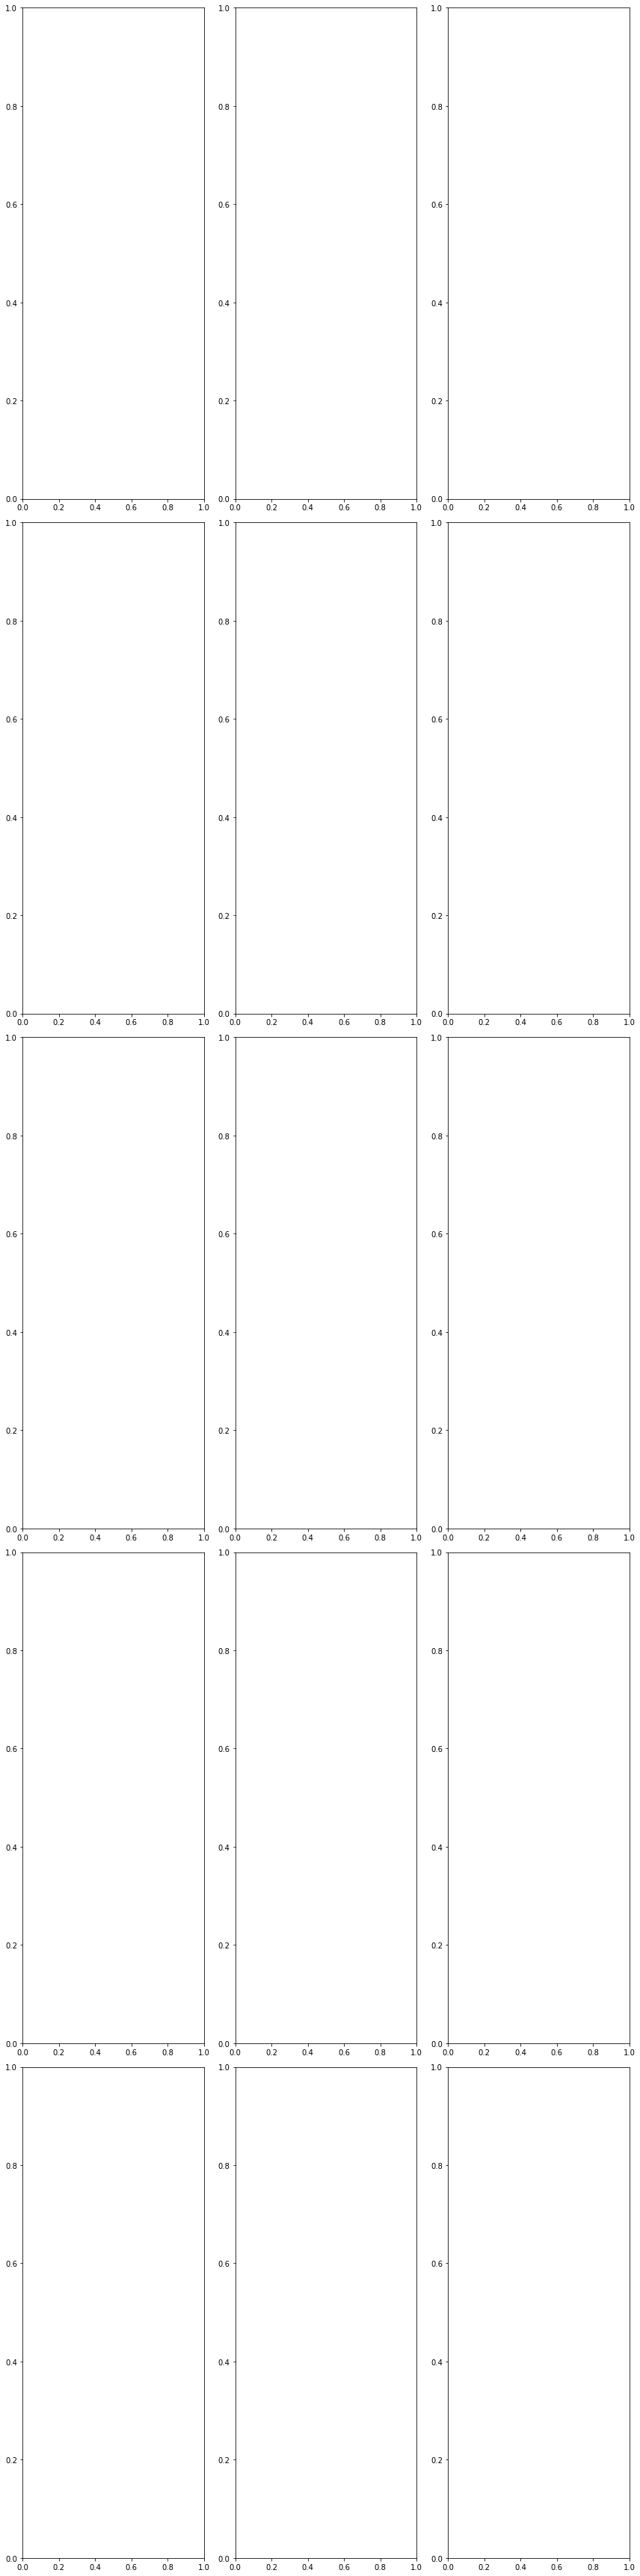

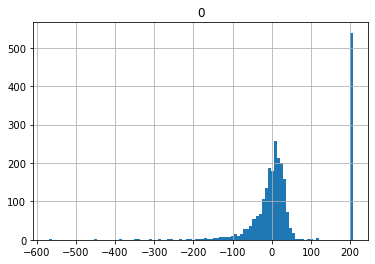

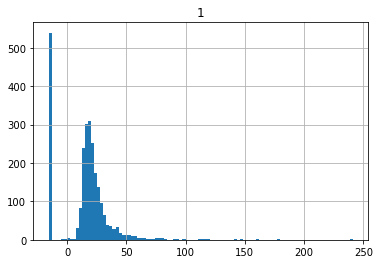

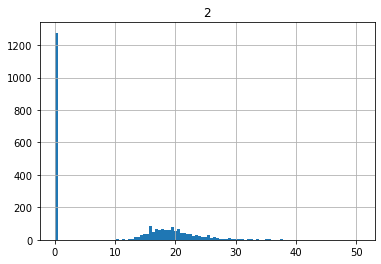

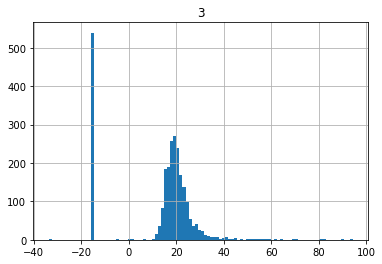

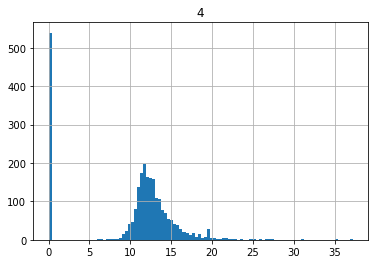

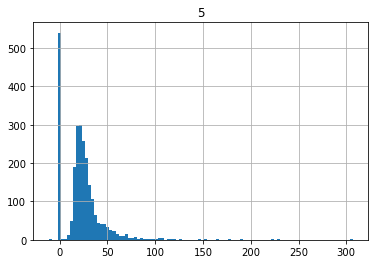

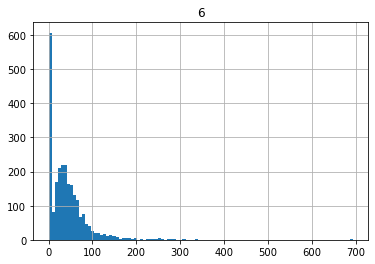

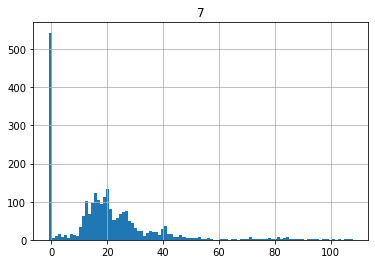

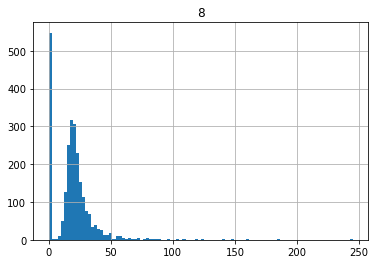

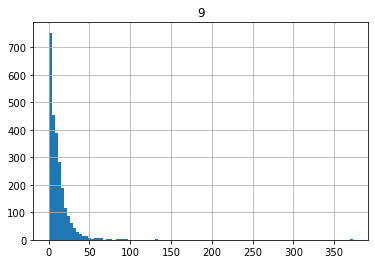

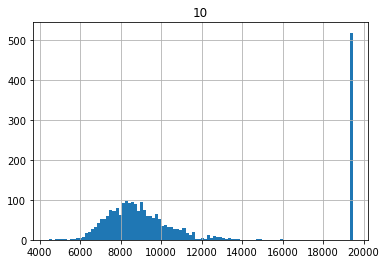

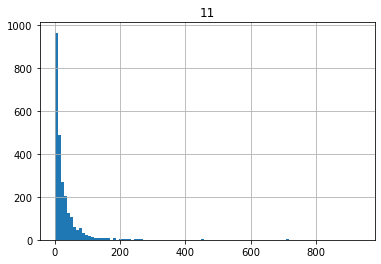

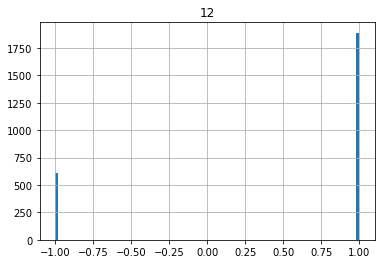

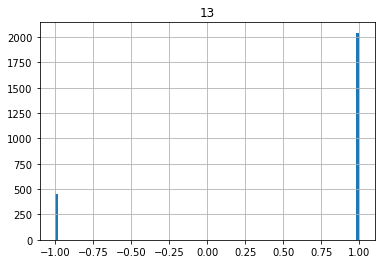

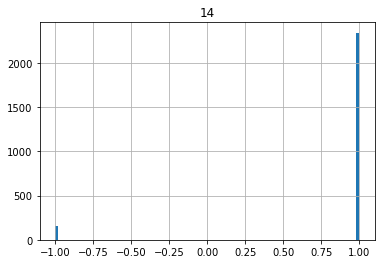

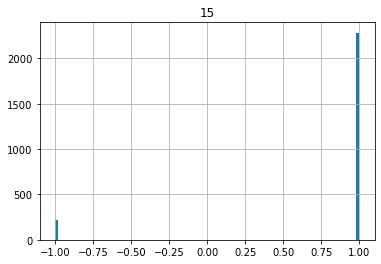

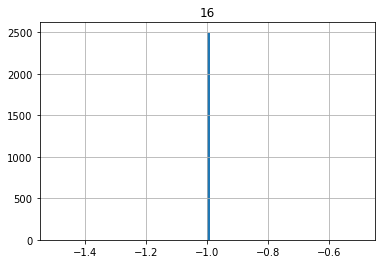

In [114]:
fig, axes = plt.subplots(len(X1.columns) // 3, 3, figsize=(12, 48))
for x in X1.columns:
    X1.hist(column = x, bins = 100)

fig.tight_layout()

In [70]:
np.mean(y1)

label    0.18725
dtype: float64

In [123]:
clf = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0)

In [124]:
clf.fit(X1,y1)

/tmp/ipykernel_10936/3345892737.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X1,y1)


RandomForestClassifier(max_depth=20, n_estimators=500, random_state=0)

In [125]:
clf.feature_importances_

array([0.03251609, 0.02711137, 0.0162853 , 0.0335681 , 0.02685036,
       0.0253168 , 0.02483726, 0.027056  , 0.02625242, 0.02953545,
       0.28908324, 0.27596676, 0.03650208, 0.04382502, 0.04272748,
       0.04256629, 0.        ])

In [126]:
from sklearn import preprocessing

In [127]:
scaler = preprocessing.StandardScaler().fit(X1)

In [128]:
lr = LogisticRegression(random_state=0,max_iter=1000).fit(scaler.transform(X1), y1)

/home/hzhuang/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [129]:
lr.coef_

array([[ 0.04156546, -0.01496157, -0.12071744,  0.04370933, -0.04633678,
         0.09828371, -0.112683  , -0.00166104, -0.02745624,  0.09845257,
         0.21984314,  0.04241348,  0.00247921, -0.26164893, -0.12733766,
        -0.15523374,  0.        ]])

In [191]:
del X1[0]

In [193]:
del X1[2]

/tmp/ipykernel_10936/68112609.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
/tmp/ipykernel_10936/68112609.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
/tmp/ipykernel_10936/68112609.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
/tmp/ipykernel_10936/68112609.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
/tmp/ipykernel_10936/68112609.py:12:

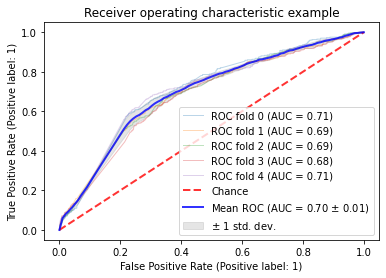

In [194]:
cv = StratifiedKFold(n_splits=5,random_state = 61,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X1, y1)):
    classifier.fit(X1.iloc[train], y1.iloc[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X1.iloc[test],
        y1.iloc[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

In [17]:
np.std([0.78,0.79,0.78,0.78,0.78])

0.0040000000000000036

/tmp/ipykernel_10936/2718872750.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
/tmp/ipykernel_10936/2718872750.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
/tmp/ipykernel_10936/2718872750.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
/tmp/ipykernel_10936/2718872750.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
/tmp/ipykernel_10936/2718872

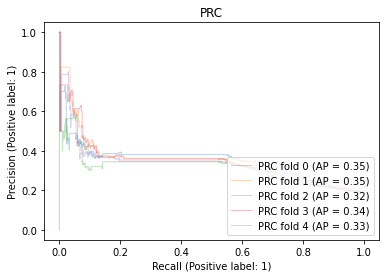

In [131]:
cv = StratifiedKFold(n_splits=5,random_state = 231,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X1, y1)):
    classifier.fit(X1.iloc[train], y1.iloc[train])
    viz = PrecisionRecallDisplay.from_estimator(
        classifier,
        X1.iloc[test],
        y1.iloc[test],
        name="PRC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    #interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    #interp_tpr[0] = 0.0
    #tprs.append(interp_tpr)
    #aucs.append(viz.roc_auc)



ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="PRC",
)
ax.legend(loc="lower right")
plt.show()

In [190]:
np.mean([0.35,0.35,0.32,0.34,0.33]),np.std([0.35,0.35,0.32,0.34,0.33])

(0.338, 0.011661903789690588)

In [19]:
np.std([0.68,0.69,0.69,0.70,0.68])

0.007483314773547842

In [20]:
np.mean([0.68,0.69,0.69,0.70,0.68])

0.688

In [21]:
import numpy as np

In [51]:
#drop two duplicated columns: save value but different column name
bibilometrics = pd.read_csv('doaj_journals_biblio_features.csv').drop(columns=['journal_paper_cited_num','journal_journal_reference_num'])

In [52]:
bibilometrics.columns

Index(['JournalId', 'NormalizedName', 'Reason', 'num_journal_publication',
       'num_journal_author', 'num_journal_affiliation',
       'journal_year_first_publish', 'journal_avg_hindex',
       'journal_avg_first_author_hindex', 'journal_avg_last_author_hindex',
       'journal_avg_middle_author_hindex', 'total_num_journal_reference',
       'total_num_journal_cited', 'journal_paper_reference_num',
       'journal_journal_cited_num', 'journal_num_author_referenced',
       'journal_num_author_cited', 'journal_num_affiliation_referenced',
       'journal_num_affiliation_cited', 'journal_num_journal_self_reference',
       'journal_num_author_self_reference',
       'journal_num_affiliation_self_reference',
       'journal_num_journal_self_cited', 'journal_num_author_self_cited',
       'journal_num_affiliation_self_cited'],
      dtype='object')

In [53]:
bibilometrics.head(3)

,JournalId,NormalizedName,Reason,num_journal_publication,num_journal_author,num_journal_affiliation,journal_year_first_publish,journal_avg_hindex,journal_avg_first_author_hindex,journal_avg_last_author_hindex,...,journal_num_author_referenced,journal_num_author_cited,journal_num_affiliation_referenced,journal_num_affiliation_cited,journal_num_journal_self_reference,journal_num_author_self_reference,journal_num_affiliation_self_reference,journal_num_journal_self_cited,journal_num_author_self_cited,journal_num_affiliation_self_cited
0,2736556212,3c tic,Still in DOAJ index,200,59,59,2012,2.481504,2.423077,0.645000,...,245,249,40,53,0,3,0,0,4,0
1,2764745361,aace clinical case reports,Still in DOAJ index,653,2458,2458,2014,10.629954,4.981982,12.782542,...,38989,2810,1926,559,46,88,106,41,24,20
2,3035250834,aaps open,Still in DOAJ index,34,158,158,2015,9.055016,6.000000,7.794118,...,3021,867,491,254,3,15,12,3,6,7


In [54]:
bibilometrics.shape

(4434, 25)

In [78]:
bibilometrics = bibilometrics.reindex(columns=['JournalId','NormalizedName','Issn','Reason','journal_year_first_publish',
                               'total_num_journal_cited','num_journal_publication','total_num_journal_reference','journal_num_journal_self_cited',
                              'journal_journal_cited_num','journal_paper_reference_num','journal_num_journal_self_reference',
                              'journal_avg_last_author_hindex','journal_num_author_self_cited',
                              'num_journal_author','journal_num_author_self_reference','journal_num_author_referenced',
                               'journal_avg_middle_author_hindex','journal_avg_first_author_hindex','journal_avg_hindex',
                               'journal_num_author_cited','journal_num_affiliation_cited','journal_num_affiliation_self_cited',
                               'num_journal_affiliation','journal_num_affiliation_referenced','journal_num_affiliation_self_reference'
                              ])

In [79]:
to_average = ['num_journal_author','num_journal_affiliation','total_num_journal_reference',
              'total_num_journal_cited','journal_journal_cited_num',
              'journal_num_author_referenced','journal_num_affiliation_referenced','journal_num_author_cited',
              'journal_num_affiliation_cited','journal_num_journal_self_reference','journal_num_author_self_reference',
              'journal_num_affiliation_self_reference','journal_num_journal_self_cited','journal_journal_cited_num'
             ]

In [80]:
to_ignore = ['journal_paper_cited','journal_journal_reference','journal_num_affiliation_self_reference','journal_num_author_self_cited','journal_num_affiliation_self_cited']

In [81]:
all_features = ['Reason','NormalizedName','journal_year_first_publish',
                               'total_num_journal_cited','num_journal_publication','total_num_journal_reference','journal_num_journal_self_cited',
                              'journal_journal_cited_num','journal_num_journal_self_reference',
                              'journal_avg_last_author_hindex','journal_num_author_self_cited',
                              'num_journal_author','journal_num_author_self_reference','journal_num_author_referenced',
                               'journal_avg_middle_author_hindex','journal_avg_first_author_hindex','journal_avg_hindex',
                               'journal_num_author_cited','journal_num_affiliation_cited','journal_num_affiliation_self_cited',
                               'num_journal_affiliation','journal_num_affiliation_referenced','journal_num_affiliation_self_reference'
                              ]
features_to_use = [f for f in all_features if f not in to_ignore] 

In [82]:
[f for f in to_average if f not in all_features ]

[]

In [83]:
bibilometrics1 = bibilometrics[bibilometrics['journal_paper_reference_num'] != 0]

In [84]:
bibilometrics2 = bibilometrics1[bibilometrics1['num_journal_author'] != 0]

In [85]:
bibilometrics3 = bibilometrics2[bibilometrics2['num_journal_publication']>10]

In [86]:
bibilometrics3[bibilometrics3['journal_num_affiliation_referenced'] == 0]

,JournalId,NormalizedName,Issn,Reason,journal_year_first_publish,total_num_journal_cited,num_journal_publication,total_num_journal_reference,journal_num_journal_self_cited,journal_journal_cited_num,...,journal_num_author_referenced,journal_avg_middle_author_hindex,journal_avg_first_author_hindex,journal_avg_hindex,journal_num_author_cited,journal_num_affiliation_cited,journal_num_affiliation_self_cited,num_journal_affiliation,journal_num_affiliation_referenced,journal_num_affiliation_self_reference


In [87]:
bibilometrics3[bibilometrics3['num_journal_affiliation'] == 0]

,JournalId,NormalizedName,Issn,Reason,journal_year_first_publish,total_num_journal_cited,num_journal_publication,total_num_journal_reference,journal_num_journal_self_cited,journal_journal_cited_num,...,journal_num_author_referenced,journal_avg_middle_author_hindex,journal_avg_first_author_hindex,journal_avg_hindex,journal_num_author_cited,journal_num_affiliation_cited,journal_num_affiliation_self_cited,num_journal_affiliation,journal_num_affiliation_referenced,journal_num_affiliation_self_reference


In [88]:
bibilometrics_to_check0 = bibilometrics3[features_to_use].copy()
bibilometrics_to_check = bibilometrics_to_check0[bibilometrics_to_check0['journal_year_first_publish']>=1980]

In [89]:
def my_log(num):
    return np.log(1+num)

In [90]:
bibilometrics_to_check.shape

(3748, 20)

In [91]:
bibilometrics_to_check[bibilometrics_to_check['journal_num_affiliation_referenced']==0]

,Reason,NormalizedName,journal_year_first_publish,total_num_journal_cited,num_journal_publication,total_num_journal_reference,journal_num_journal_self_cited,journal_journal_cited_num,journal_num_journal_self_reference,journal_avg_last_author_hindex,num_journal_author,journal_num_author_self_reference,journal_num_author_referenced,journal_avg_middle_author_hindex,journal_avg_first_author_hindex,journal_avg_hindex,journal_num_author_cited,journal_num_affiliation_cited,num_journal_affiliation,journal_num_affiliation_referenced


In [92]:
bibilometrics_after_average = bibilometrics_to_check.copy()

In [93]:
for x in bibilometrics_after_average.columns:
    if x in to_average:
        bibilometrics_after_average[x] = bibilometrics_after_average[x]/bibilometrics_after_average['num_journal_publication']

In [94]:
for x in bibilometrics_after_average.columns:
    print(x)
    print(min(bibilometrics_after_average[x]))

Reason
Embargo on articles
NormalizedName
#tear: revista de educação, ciência e tecnologia
journal_year_first_publish
1980
total_num_journal_cited
0.0
num_journal_publication
11
total_num_journal_reference
0.0021645021645021645
journal_num_journal_self_cited
0.0
journal_journal_cited_num
0.0
journal_num_journal_self_reference
0.0
journal_avg_last_author_hindex
0.0
num_journal_author
0.00023046784973496196
journal_num_author_self_reference
0.0
journal_num_author_referenced
0.0021645021645021645
journal_avg_middle_author_hindex
0.0
journal_avg_first_author_hindex
0.0
journal_avg_hindex
0.0
journal_num_author_cited
0.0
journal_num_affiliation_cited
0.0
num_journal_affiliation
0.00023046784973496196
journal_num_affiliation_referenced
0.0018656716417910447


In [95]:
bibilometrics_after_average.to_csv('doaj_bibilometrics_after_average.csv',index=False)

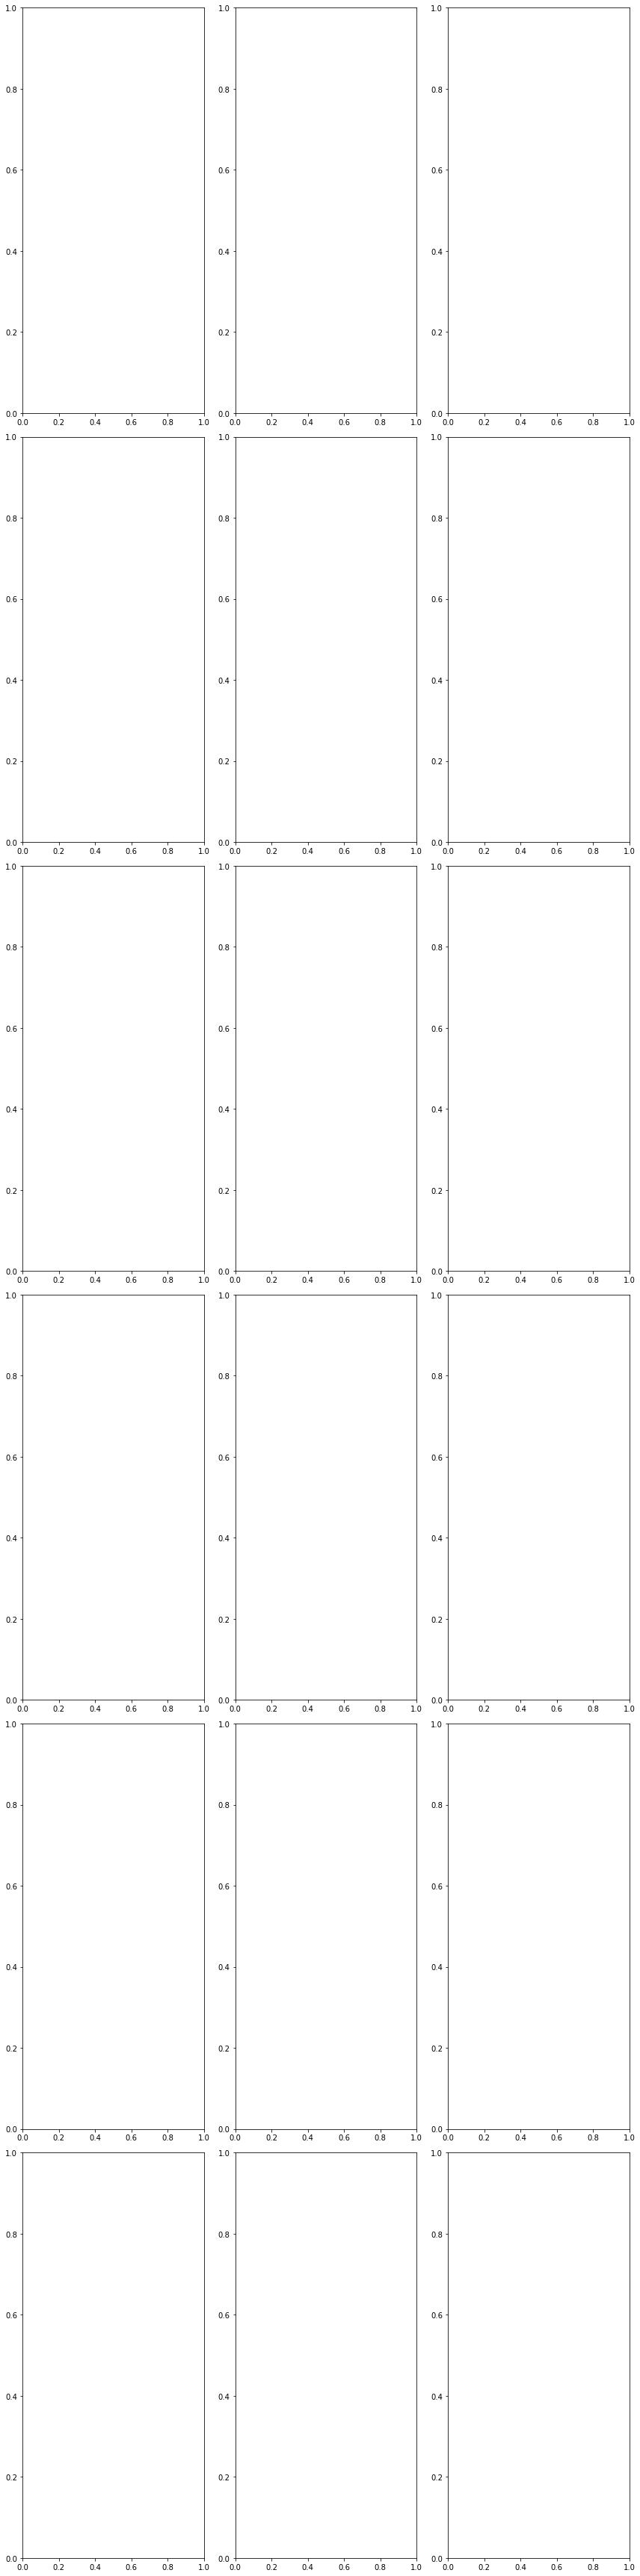

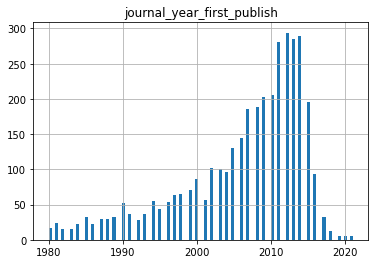

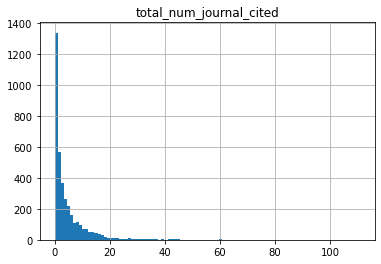

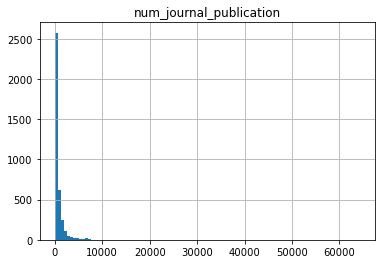

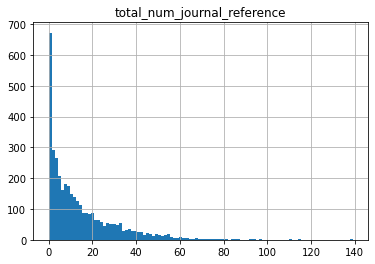

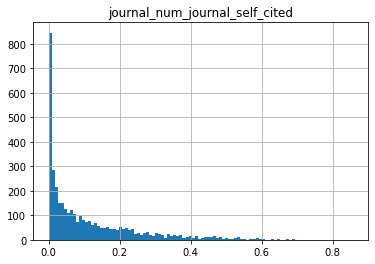

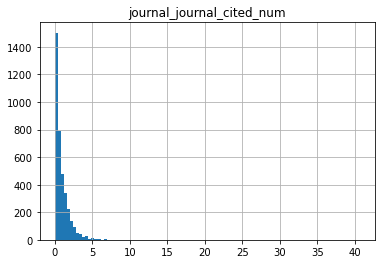

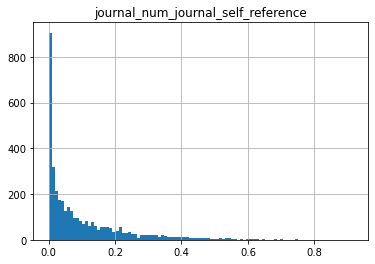

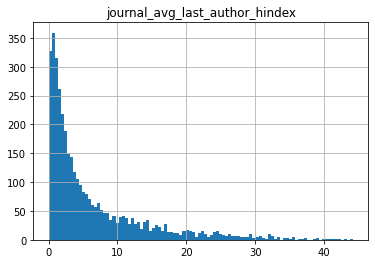

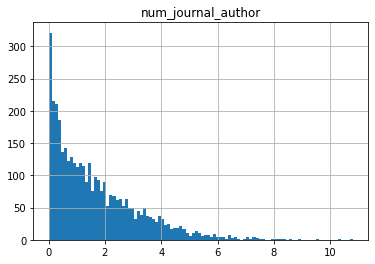

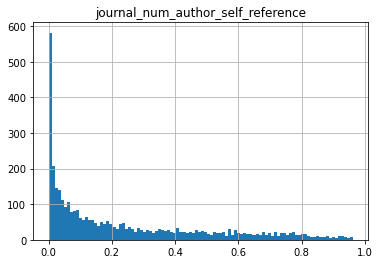

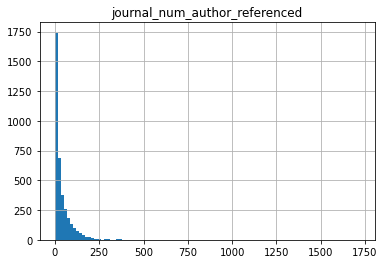

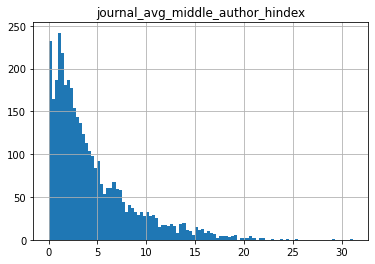

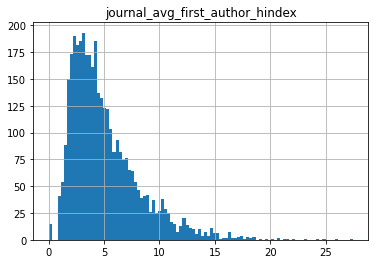

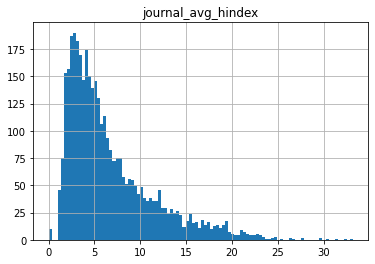

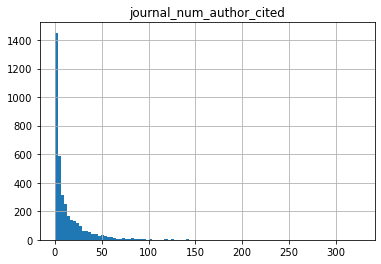

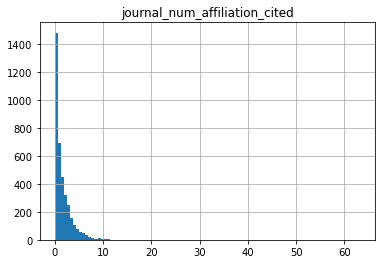

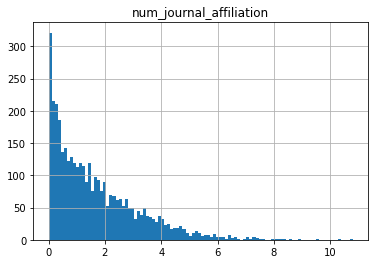

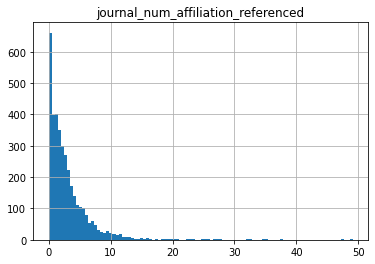

In [153]:
fig, axes = plt.subplots(len(bibilometrics_to_check.columns) // 3, 3, figsize=(12, 48))
for x in bibilometrics_after_average.columns:
    if x != 'Reason':
        bibilometrics_after_average.hist(column = x, bins = 100)

fig.tight_layout()

In [154]:
a = ['JournalId','NormalizedName','Issn','Reason','journal_year_first_publish',
                               'total_num_journal_cited','num_journal_publication','total_num_journal_reference','journal_num_journal_self_cited',
                              'journal_journal_cited_num','journal_paper_reference_num','journal_num_journal_self_reference',
                              'journal_avg_last_author_hindex','journal_num_author_self_cited',
                              'num_journal_author','journal_num_author_self_reference','journal_num_author_referenced',
                               'journal_avg_middle_author_hindex','journal_avg_first_author_hindex','journal_avg_hindex',
                               'journal_num_author_cited','journal_num_affiliation_cited','journal_num_affiliation_self_cited',
                               'num_journal_affiliation','journal_num_affiliation_referenced','journal_num_affiliation_self_reference'
                              ]

In [155]:
bibilometrics_to_check['total_num_journal_reference']

0         90
1       9397
2        778
3         12
5        509
        ... 
4429     132
4430     346
4431     847
4432      46
4433      23
Name: total_num_journal_reference, Length: 3748, dtype: int64

In [156]:
white_bib = bibilometrics_after_average[bibilometrics_after_average['Reason'] == 'Still in DOAJ index'].drop(columns=['Reason'])
white_bib['label'] = 0
unwhite_bib = bibilometrics_after_average[bibilometrics_after_average['Reason'] != 'Still in DOAJ index'].drop(columns=['Reason'])
unwhite_bib['label'] = 1

In [157]:
all_tb = pd.concat([unwhite_bib,white_bib]).reset_index(drop=True)

X6 = all_tb.loc[:, all_tb.columns != 'label']
y6 = all_tb.loc[:, all_tb.columns == 'label']

In [158]:
all_tb.shape

(3748, 19)

In [159]:
clf = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0)

In [160]:
clf.fit(X6,y6)

/tmp/ipykernel_10936/746634414.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X6,y6)


RandomForestClassifier(max_depth=20, n_estimators=500, random_state=0)

In [161]:
clf.feature_importances_

array([0.0744374 , 0.05060545, 0.06248735, 0.05018388, 0.06014996,
       0.05695486, 0.05543799, 0.06458834, 0.05656223, 0.05307162,
       0.04639393, 0.06827373, 0.0473748 , 0.0506961 , 0.05055499,
       0.05300406, 0.05445462, 0.04476867])

In [162]:
scaler = preprocessing.StandardScaler().fit(X6)
lr = LogisticRegression(random_state=0,max_iter=1000).fit(scaler.transform(X6), y6)
lr.coef_

/home/hzhuang/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 0.04946249,  0.13119768,  0.13677524,  0.45019691, -0.29240417,
         0.99089589, -0.49215879, -2.02707057,  0.57324164,  0.02172475,
        -0.58640158, -0.61530677,  0.00468782,  1.08136785, -0.58439643,
         0.01038987,  0.57324164, -0.39713528]])

/tmp/ipykernel_10936/2688477472.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X6.iloc[train], y6.iloc[train])
/tmp/ipykernel_10936/2688477472.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X6.iloc[train], y6.iloc[train])
/tmp/ipykernel_10936/2688477472.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X6.iloc[train], y6.iloc[train])
/tmp/ipykernel_10936/2688477472.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X6.iloc[train], y6.iloc[train])
/tmp/ipykernel_10936/2688477

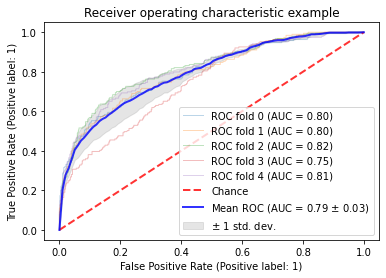

In [163]:
cv = StratifiedKFold(n_splits=5,random_state = 611,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X6, y6)):
    classifier.fit(X6.iloc[train], y6.iloc[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X6.iloc[test],
        y6.iloc[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

/tmp/ipykernel_10936/86067903.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X6.iloc[train], y6.iloc[train])
/tmp/ipykernel_10936/86067903.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X6.iloc[train], y6.iloc[train])
/tmp/ipykernel_10936/86067903.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X6.iloc[train], y6.iloc[train])
/tmp/ipykernel_10936/86067903.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X6.iloc[train], y6.iloc[train])
/tmp/ipykernel_10936/86067903.py:12:

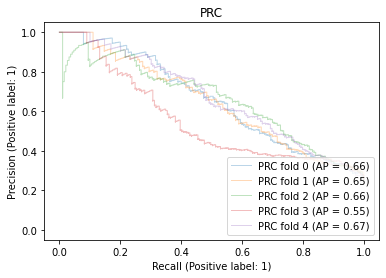

In [164]:
cv = StratifiedKFold(n_splits=5,random_state = 611,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X6, y6)):
    classifier.fit(X6.iloc[train], y6.iloc[train])
    viz = PrecisionRecallDisplay.from_estimator(
        classifier,
        X6.iloc[test],
        y6.iloc[test],
        name="PRC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    #interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    #interp_tpr[0] = 0.0
    #tprs.append(interp_tpr)
    #aucs.append(viz.roc_auc)



ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="PRC",
)
ax.legend(loc="lower right")
plt.show()

In [42]:
np.mean([0.66,0.65,0.66,0.55,0.67])

0.6380000000000001

In [187]:
np.std([0.66,0.65,0.66,0.55,0.67])

0.044452221541785734

In [125]:
#before remove duplicates
np.mean([0.63,0.59,0.66,0.62,0.61])

0.622

In [124]:
#before remove outliers
np.mean([0.60,0.60,0.64,0.65,0.59])

0.6159999999999999

In [51]:
np.std([0.75,0.79,0.73,0.79,0.77])

0.023323807579381222

In [167]:
tag_features1 = []
tag_features0 = []

for batch in range(100):
    #labeled_feature_data_local_html_v1
    with open('./labeled_journal_feature_2022/web_tag_features_1_'+str(batch)+'.pkl', 'rb') as f:
        tag_features1 += pickle.load(f)

    with open('./labeled_journal_feature_2022/web_tag_features_0_'+str(batch)+'.pkl', 'rb') as f:
        tag_features0 += pickle.load(f)

print('tag feature')
print(len(tag_features1))
#print(tag_features1)
print(len(tag_features0))
#print(tag_features0)

tag_features1 = [ft for ind,ft in enumerate(tag_features1) if len(ft) >1]
tag_features0 = [ft for ind,ft in enumerate(tag_features0) if len(ft) >1]

print(len(tag_features1))
print(len(tag_features0))

data = tag_features1 + tag_features0
label = [1 for ft in tag_features1] + [0 for ft in tag_features0]



vectorizer = TfidfVectorizer()
X2 = vectorizer.fit_transform(data)
y2 = np.array(label)

tag feature
2567
12859
2563
12791


In [168]:
#pickle.dump(vectorizer, open('webtag_tfidf', 'wb'))

In [169]:
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0).fit(X2, y2)

In [170]:
term_weights = dict(zip(vectorizer.get_feature_names_out(), classifier.feature_importances_))

In [171]:
dict(sorted(term_weights.items(), key=lambda item: item[1]))

{'avance': 0.0,
 'comcol': 0.0,
 'custom': 0.0,
 'field': 0.0,
 'group': 0.0,
 'hist': 0.0,
 'humanidades': 0.0,
 'info': 0.0,
 'investigaciones': 0.0,
 'log': 0.0,
 'mailto': 0.0,
 'metrics': 0.0,
 'over': 0.0,
 'popular': 0.0,
 'psikologi': 0.0,
 'regionales': 0.0,
 'resource': 0.0,
 'right': 0.0,
 'rosario': 0.0,
 'socio': 0.0,
 'surd': 0.0,
 'teori': 0.0,
 'ugm': 0.0,
 'trabalho': 1.0147272877182347e-09,
 'annotation': 2.417647654113272e-09,
 'pr': 5.204947301257097e-09,
 'latindex': 9.898293278730063e-09,
 'pberghahn': 1.1876328724250936e-08,
 'antropolog': 1.2289425305398728e-08,
 'sociales': 1.4312590960905716e-08,
 'metaanalisis': 1.50789938966288e-08,
 'stockticker': 1.5354134939177393e-08,
 'revista': 1.997008900830767e-08,
 'mmultiscripts': 2.3841309660109595e-08,
 'historia': 2.5408339819688984e-08,
 'my': 2.5592555518710986e-08,
 'metacognisi': 2.587413446819429e-08,
 'cultura': 2.7172260345845174e-08,
 'leaderboard': 2.9614590535734412e-08,
 'white': 3.151673570455719e-08

In [172]:
#scaler = preprocessing.StandardScaler().fit(X2)
lr = LogisticRegression(random_state=0,max_iter=1000).fit(X2, y2)
lr.coef_

array([[-8.31604078e-03,  5.07034858e-01,  2.49372373e-03,
        -3.82409974e-02,  1.42171443e-02,  9.58352829e-03,
        -5.97417623e-03, -2.29408367e-02, -6.75382920e-01,
        -2.75197618e-02, -7.55291646e-03,  2.53950529e-01,
         4.99742818e-02, -1.30734470e+00,  4.45450982e-03,
         1.71742567e-02, -1.51817277e-02,  2.67104206e-02,
        -9.64243737e-02, -9.80461639e-04,  8.90901964e-03,
        -4.42974044e-01, -1.74331085e-01,  2.58987723e-02,
         6.01287168e-01,  4.75448211e-01, -1.43368340e-02,
        -4.40974947e-01, -1.69234479e-02, -1.02693162e+00,
         2.18167509e-03,  1.65670903e+00, -1.69234479e-02,
         1.42171443e-02,  1.42171443e-02, -3.02369400e-02,
        -1.69234479e-02, -2.30589317e+00, -8.09463184e-03,
         3.68151914e-01,  1.57712301e-01, -2.31438681e-02,
        -5.21045922e-03,  2.94862474e-01,  8.90901964e-03,
         8.74198031e-03,  3.06638278e-02,  5.51457505e-01,
        -7.99390603e-03, -1.59878121e-02, -7.93950447e-0

In [173]:
term_sign = dict(zip(vectorizer.get_feature_names_out(), lr.coef_[0]))

In [174]:
term_sign['li']

0.6659935356571738

In [175]:
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0).fit(X2, y2)
pickle.dump(classifier, open('webtag_classifer', 'wb'))

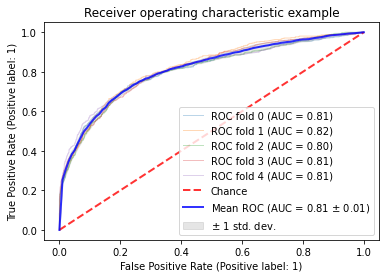

In [176]:
cv = StratifiedKFold(n_splits=5,random_state = 231,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X2, y2)):
    classifier.fit(X2[train], y2[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X2[test],
        y2[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

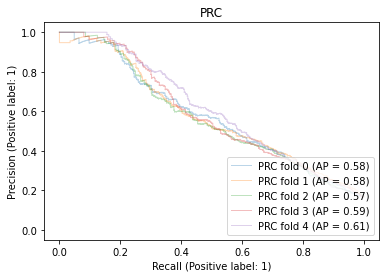

In [177]:
cv = StratifiedKFold(n_splits=5,random_state = 231,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X2, y2)):
    classifier.fit(X2[train], y2[train])
    viz = PrecisionRecallDisplay.from_estimator(
        classifier,
        X2[test],
        y2[test],
        name="PRC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    #interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    #interp_tpr[0] = 0.0
    #tprs.append(interp_tpr)
    #aucs.append(viz.roc_auc)



ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="PRC",
)
ax.legend(loc="lower right")
plt.show()

In [188]:
np.mean([0.58,0.58,0.57,0.59,0.61]),np.std([0.58,0.58,0.57,0.59,0.61])

(0.586, 0.013564659966250548)

In [28]:
np.mean([0.83,0.83,0.83,0.84,0.81])

0.828

In [29]:
np.std([0.83,0.83,0.83,0.84,0.81])

0.00979795897113268

In [178]:
font_features1 = []
font_features0 = []

for batch in range(100):
    with open('./labeled_journal_feature_2022/web_font_features_1_'+str(batch)+'.pkl', 'rb') as f:
        font_features1 += pickle.load(f)

    with open('./labeled_journal_feature_2022/web_font_features_0_'+str(batch)+'.pkl', 'rb') as f:
        font_features0 += pickle.load(f)

print('font feature')
print(len(font_features1))
print(len(font_features0))
font_feature1 = [ft for ind,ft in enumerate(font_features1) if len(ft) > 0]
font_feature0 = [ft for ind,ft in enumerate(font_features0) if len(ft) > 0]
font_feature = font_feature1 + font_feature0
label = [1 for ft in font_feature1] + [0 for ft in font_feature0]

print(len(font_feature1))
print(len(font_feature0))

vectorizer = TfidfVectorizer()
X3 = vectorizer.fit_transform([' '.join(ff) for ff in font_feature])
y3 = np.array(label)

font feature
2567
12859
1725
10113


In [115]:
#pickle.dump(vectorizer, open('webfont_tfidf', 'wb'))

In [179]:
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0).fit(X3, y3)
term_weights = dict(zip(vectorizer.get_feature_names_out(), classifier.feature_importances_))
dict(sorted(term_weights.items(), key=lambda item: item[1]))

{'1025px': 0.0,
 '400italic': 0.0,
 '700': 0.0,
 'all': 0.0,
 'allerta': 0.0,
 'alumni': 0.0,
 'baskervville': 0.0,
 'belleetage': 0.0,
 'catamaran': 0.0,
 'chancery': 0.0,
 'chewy': 0.0,
 'circula': 0.0,
 'cooperhewitt': 0.0,
 'dayposterblack': 0.0,
 'droidserif': 0.0,
 'england': 0.0,
 'ffdinwebprobold': 0.0,
 'ffdinwebprolight': 0.0,
 'ffdinwebpromedium': 0.0,
 'ffdinwebproregular': 0.0,
 'fontomascustomregular': 0.0,
 'frontiers': 0.0,
 'futuraextended': 0.0,
 'georgiaproregular': 0.0,
 'hallelujah': 0.0,
 'hoeferroman': 0.0,
 'iconography': 0.0,
 'iconvault': 0.0,
 'inserat': 0.0,
 'italicsmtext': 0.0,
 'itcfranklingothicw02': 0.0,
 'latin': 0.0,
 'literata': 0.0,
 'logofont': 0.0,
 'md_812704': 0.0,
 'md_812972': 0.0,
 'metanormalc': 0.0,
 'momizat': 0.0,
 'muni': 0.0,
 'nafeeswebnaskhregular': 0.0,
 'naskh': 0.0,
 'news2': 0.0,
 'osf': 0.0,
 'patrick': 0.0,
 'philosopherbolditalic': 0.0,
 'porto': 0.0,
 'proximanovasemibold': 0.0,
 'quadmenu': 0.0,
 'sansbold': 0.0,
 'sanserif':

In [180]:
lr = LogisticRegression(random_state=0,max_iter=1000).fit(X3, y3)
lr.coef_

array([[-0.23688505, -0.14497993,  1.0388704 , ...,  0.01977095,
         0.13162415,  0.13162415]])

In [181]:
term_sign = dict(zip(vectorizer.get_feature_names_out(), lr.coef_[0]))

In [182]:
term_sign

{'0625em': -0.2368850527257134,
 '063em': -0.144979930321633,
 '0em': 1.038870395661253,
 '0px': 0.20427592945190562,
 '10': 0.7356910516203434,
 '1025px': -0.007745385185584008,
 '120': -0.04304073597952576,
 '1200px': 0.20427592945190562,
 '120em': -0.0342900463835726,
 '12px': -0.008612714778588874,
 '14px': 0.02285720821254042,
 '2014': -0.04642783737897633,
 '27px': -0.080564256540266,
 '32': -0.13821533304944242,
 '3d': -0.04993834501101895,
 '40': -0.148718895428797,
 '400': -0.035273894598955885,
 '400italic': -0.07441111962966677,
 '40em': 0.7386400679680478,
 '45ligh': 0.029156165292032406,
 '47': 0.01970488356280262,
 '48em': 0.03940976712560524,
 '50': 0.2548399625691797,
 '544px': 0.20427592945190562,
 '55': -0.04553558063973694,
 '55roma': 0.09639510040906933,
 '64': -0.07545112778967927,
 '64em': 0.7386400679680478,
 '65md': -0.043469394178115454,
 '65medi': -0.6091363641299516,
 '700': -0.07441111962966677,
 '75em': 1.038870395661253,
 '768px': 0.20427592945190562,
 '90

In [183]:
term_sign['neue']

-2.222311710094114

In [184]:
len(label)

11838

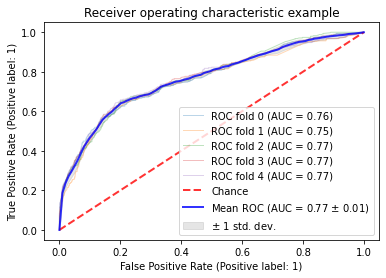

In [185]:
cv = StratifiedKFold(n_splits=5,random_state = 231,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X3, y3)):
    classifier.fit(X3[train], y3[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X3[test],
        y3[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

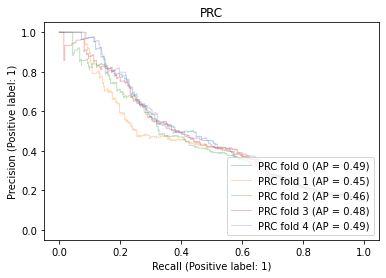

In [186]:
cv = StratifiedKFold(n_splits=5,random_state = 231,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X3, y3)):
    classifier.fit(X3[train], y3[train])
    viz = PrecisionRecallDisplay.from_estimator(
        classifier,
        X3[test],
        y3[test],
        name="PRC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    #interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    #interp_tpr[0] = 0.0
    #tprs.append(interp_tpr)
    #aucs.append(viz.roc_auc)



ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="PRC",
)
ax.legend(loc="lower right")
plt.show()

In [189]:
np.mean([0.49,0.45,0.46,0.48,0.49]),np.std([0.49,0.45,0.46,0.48,0.49])

(0.47400000000000003, 0.016248076809271907)

In [37]:
np.mean([0.72,0.68,0.70,0.69,0.69])

0.696

In [38]:
np.std([0.72,0.68,0.70,0.69,0.69])

0.013564659966250522

In [37]:
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
from sklearn.metrics import roc_auc_score

<ipython-input-54-8556b4541887>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf1 = classifier1.fit(X1.iloc[train], y1.iloc[train])
/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-54-8556b4541887>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf1 = classifier1.fit(X1.iloc[train], y1.iloc[train])
/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

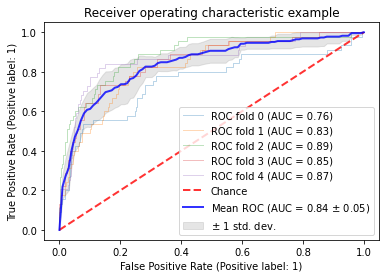

In [54]:
cv = StratifiedKFold(n_splits=5)
classifier1 = RandomForestClassifier(max_depth=5, random_state=0)
classifier2 = RandomForestClassifier(max_depth=5, random_state=0)
classifier3 = RandomForestClassifier(max_depth=5, random_state=0)
classifier4 = RandomForestClassifier(max_depth=5, random_state=0)
classifier = LogisticRegression(random_state=0)
#classifier = RandomForestClassifier(max_depth = 10,n_estimators =500, random_state=0)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)


fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X1, y1)):
   
    XX = []
    clf1 = classifier1.fit(X1.iloc[train], y1.iloc[train])
    F1 = clf1.predict_proba(X1.iloc[train])[:, 1]
    #print(roc_auc_score(y1.iloc[train],F1))
    clf2 = classifier2.fit(X2[train], y2[train])
    F2 = clf2.predict_proba(X2[train])[:, 1]
    #print(roc_auc_score(y1.iloc[train],F2))
    clf3 = classifier3.fit(X3[train], y3[train])
    F3 = clf3.predict_proba(X3[train])[:, 1]
    #print(roc_auc_score(y1.iloc[train],F3))
    clf4 = classifier4.fit(X4[train], y4[train])
    F4 = clf4.predict_proba(X4[train])[:, 1]
    #print(roc_auc_score(y1.iloc[train],F4))
    
    XX0 = []
    X01 = clf1.predict_proba(X1.iloc[test])[:, 1]
    #print(roc_auc_score(y1.iloc[test],X01))
    X02 = clf2.predict_proba(X2[test])[:, 1]
    #print(roc_auc_score(y1.iloc[test],X02))
    X03 = clf3.predict_proba(X3[test])[:, 1]
    #print(roc_auc_score(y1.iloc[test],X03))
    X04 = clf4.predict_proba(X4[test])[:, 1]
    #print(roc_auc_score(y1.iloc[test],X04))
    
    for ind, xx in enumerate(F1):
        #XX.append([F1[ind],F2[ind],F3[ind]])
        XX.append([F1[ind],F2[ind],F3[ind],F4[ind]])
        #XX.append([F1[ind]])
    
    for ind, xx in enumerate(X01):
        #XX0.append([X01[ind],X02[ind],X03[ind]])
        XX0.append([X01[ind],X02[ind],X03[ind],X04[ind]])
        #XX0.append([X01[ind]])
        
    
    
    classifier.fit(XX, np.array(y1)[train])
    #print(classifier.coef_)
    #print(len(XX0))
    #print(np.array(XX0)[test])
    
    viz = RocCurveDisplay.from_estimator(
        classifier,
        np.array(XX0),
        y1.iloc[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

# Connect different features into one feature to predict

In [6]:
import pickle
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

In [12]:
web_features1 = []
web_features0 = []

for batch in range(0,100):
    with open('./labeled_journal_feature_2022/web_content_features_1_'+str(batch)+'.pkl', 'rb') as f:
        web_features1 += pickle.load(f)

    with open('./labeled_journal_feature_2022/web_content_features_0_'+str(batch)+'.pkl', 'rb') as f:
        web_features0 += pickle.load(f)

In [13]:
tag_features1 = []
tag_features0 = []

for batch in range(100):
    with open('./labeled_journal_feature_2022/web_tag_features_1_'+str(batch)+'.pkl', 'rb') as f:
        tag_features1 += pickle.load(f)

    with open('./labeled_journal_feature_2022/web_tag_features_0_'+str(batch)+'.pkl', 'rb') as f:
        tag_features0 += pickle.load(f)

In [14]:
len(web_features1),len(web_features0),

(2567, 12859)

In [15]:
len(tag_features1),len(tag_features0),

(2567, 12859)

In [16]:
#drop two duplicated columns: save value but different column name
bibilometrics = pd.read_csv('doaj_journals_biblio_features.csv').drop(columns=['journal_paper_cited_num','journal_journal_reference_num'])

In [17]:
bibilometrics.head(3)

,JournalId,NormalizedName,Reason,num_journal_publication,num_journal_author,num_journal_affiliation,journal_year_first_publish,journal_avg_hindex,journal_avg_first_author_hindex,journal_avg_last_author_hindex,...,journal_num_author_referenced,journal_num_author_cited,journal_num_affiliation_referenced,journal_num_affiliation_cited,journal_num_journal_self_reference,journal_num_author_self_reference,journal_num_affiliation_self_reference,journal_num_journal_self_cited,journal_num_author_self_cited,journal_num_affiliation_self_cited
0,2736556212,3c tic,Still in DOAJ index,200,59,59,2012,2.481504,2.423077,0.645000,...,245,249,40,53,0,3,0,0,4,0
1,2764745361,aace clinical case reports,Still in DOAJ index,653,2458,2458,2014,10.629954,4.981982,12.782542,...,38989,2810,1926,559,46,88,106,41,24,20
2,3035250834,aaps open,Still in DOAJ index,34,158,158,2015,9.055016,6.000000,7.794118,...,3021,867,491,254,3,15,12,3,6,7


In [18]:
bibilometrics.shape

(4434, 25)

In [48]:
bibilometrics = bibilometrics.reindex(columns=['JournalId','NormalizedName','Issn','Reason','journal_year_first_publish',
                               'total_num_journal_cited','num_journal_publication','total_num_journal_reference','journal_num_journal_self_cited',
                              'journal_journal_cited_num','journal_paper_reference_num','journal_num_journal_self_reference',
                              'journal_avg_last_author_hindex','journal_num_author_self_cited',
                              'num_journal_author','journal_num_author_self_reference','journal_num_author_referenced',
                               'journal_avg_middle_author_hindex','journal_avg_first_author_hindex','journal_avg_hindex',
                               'journal_num_author_cited','journal_num_affiliation_cited','journal_num_affiliation_self_cited',
                               'num_journal_affiliation','journal_num_affiliation_referenced','journal_num_affiliation_self_reference'
                              ])

In [49]:
to_average = ['num_journal_author','num_journal_affiliation','total_num_journal_reference',
              'total_num_journal_cited','journal_journal_cited_num',
              'journal_num_author_referenced','journal_num_affiliation_referenced','journal_num_author_cited',
              'journal_num_affiliation_cited','journal_num_journal_self_reference','journal_num_author_self_reference',
              'journal_num_affiliation_self_reference','journal_num_journal_self_cited','journal_journal_cited_num'
             ]

In [50]:
to_ignore = ['journal_paper_cited','journal_journal_reference','journal_num_affiliation_self_reference','journal_num_author_self_cited','journal_num_affiliation_self_cited']

In [51]:
all_features = ['NormalizedName','Reason','journal_year_first_publish',
                               'total_num_journal_cited','num_journal_publication','total_num_journal_reference','journal_num_journal_self_cited',
                              'journal_journal_cited_num','journal_num_journal_self_reference',
                              'journal_avg_last_author_hindex','journal_num_author_self_cited',
                              'num_journal_author','journal_num_author_self_reference','journal_num_author_referenced',
                               'journal_avg_middle_author_hindex','journal_avg_first_author_hindex','journal_avg_hindex',
                               'journal_num_author_cited','journal_num_affiliation_cited','journal_num_affiliation_self_cited',
                               'num_journal_affiliation','journal_num_affiliation_referenced','journal_num_affiliation_self_reference'
                              ]
features_to_use = [f for f in all_features if f not in to_ignore] 

In [52]:
[f for f in to_average if f not in all_features ]

[]

In [53]:
bibilometrics1 = bibilometrics[bibilometrics['journal_paper_reference_num'] != 0]

In [54]:
bibilometrics2 = bibilometrics1[bibilometrics1['num_journal_author'] != 0]

In [55]:
bibilometrics3 = bibilometrics2[bibilometrics2['num_journal_publication']>10]

In [56]:
bibilometrics3[bibilometrics3['journal_num_affiliation_referenced'] == 0]

,JournalId,NormalizedName,Issn,Reason,journal_year_first_publish,total_num_journal_cited,num_journal_publication,total_num_journal_reference,journal_num_journal_self_cited,journal_journal_cited_num,...,journal_num_author_referenced,journal_avg_middle_author_hindex,journal_avg_first_author_hindex,journal_avg_hindex,journal_num_author_cited,journal_num_affiliation_cited,journal_num_affiliation_self_cited,num_journal_affiliation,journal_num_affiliation_referenced,journal_num_affiliation_self_reference


In [57]:
bibilometrics_to_check0 = bibilometrics3[features_to_use].copy()
bibilometrics_to_check = bibilometrics_to_check0[bibilometrics_to_check0['journal_year_first_publish']>=1980]

In [58]:
bibilometrics_to_check.shape

(3748, 20)

In [59]:
bibilometrics_after_average = bibilometrics_to_check.copy()

In [60]:
for x in bibilometrics_after_average.columns:
    if x in to_average:
        bibilometrics_after_average[x] = bibilometrics_after_average[x]/bibilometrics_after_average['num_journal_publication']

In [61]:
bibilometrics_after_average.columns

Index(['NormalizedName', 'Reason', 'journal_year_first_publish',
       'total_num_journal_cited', 'num_journal_publication',
       'total_num_journal_reference', 'journal_num_journal_self_cited',
       'journal_journal_cited_num', 'journal_num_journal_self_reference',
       'journal_avg_last_author_hindex', 'num_journal_author',
       'journal_num_author_self_reference', 'journal_num_author_referenced',
       'journal_avg_middle_author_hindex', 'journal_avg_first_author_hindex',
       'journal_avg_hindex', 'journal_num_author_cited',
       'journal_num_affiliation_cited', 'num_journal_affiliation',
       'journal_num_affiliation_referenced'],
      dtype='object')

In [62]:
white_bib = bibilometrics_after_average[bibilometrics_after_average['Reason'] == 'Still in DOAJ index'].drop(columns=['Reason'])
white_bib['label'] = 0
unwhite_bib = bibilometrics_after_average[bibilometrics_after_average['Reason'] != 'Still in DOAJ index'].drop(columns=['Reason'])
unwhite_bib['label'] = 1

In [63]:
white_bib.shape

(2800, 20)

In [64]:
unwhite_bib.shape

(948, 20)

In [36]:
white_bib

,journal_year_first_publish,total_num_journal_cited,num_journal_publication,total_num_journal_reference,journal_num_journal_self_cited,journal_journal_cited_num,journal_num_journal_self_reference,journal_avg_last_author_hindex,num_journal_author,journal_num_author_self_reference,journal_num_author_referenced,journal_avg_middle_author_hindex,journal_avg_first_author_hindex,journal_avg_hindex,journal_num_author_cited,journal_num_affiliation_cited,num_journal_affiliation,journal_num_affiliation_referenced,label
0,2012,0.470000,200,0.450000,0.000000,0.140000,0.000000,0.645000,0.295000,0.015000,1.225000,0.617424,2.423077,2.481504,1.245000,0.265000,0.295000,0.200000,0
1,2014,0.926493,653,14.390505,0.062787,0.428790,0.070444,12.782542,3.764165,0.134763,59.707504,6.743214,4.981982,10.629954,4.303216,0.856049,3.764165,2.949464,0
2,2015,5.970588,34,22.882353,0.088235,2.764706,0.088235,7.794118,4.647059,0.441176,88.852941,7.119501,6.000000,9.055016,25.500000,7.470588,4.647059,14.441176,0
3,2008,0.065217,46,0.260870,0.000000,0.021739,0.000000,0.217391,0.065217,0.000000,0.304348,0.333333,2.800000,1.928571,0.043478,0.043478,0.065217,0.108696,0
5,2012,1.351124,356,1.429775,0.028090,0.182584,0.019663,0.825843,0.328652,0.002809,1.991573,0.413793,1.352941,1.652174,2.550562,0.205056,0.328652,0.396067,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4149,2000,0.896368,936,0.395299,0.000000,0.423077,0.000000,2.090812,0.074786,0.006410,1.788462,2.269177,4.012270,4.503386,3.706197,0.335470,0.074786,0.431624,0
4150,2013,0.517857,168,2.791667,0.005952,0.327381,0.005952,0.678571,0.857143,0.017857,8.976190,1.161856,3.296296,3.639259,2.071429,0.297619,0.857143,1.886905,0
4151,2005,0.401487,538,0.914498,0.000000,0.174721,0.000000,1.713755,0.091078,0.016729,2.401487,2.096918,2.881579,5.042284,1.020446,0.215613,0.091078,0.522305,0
4152,2012,0.240964,83,11.349398,0.012048,0.156627,0.012048,1.228916,2.156627,0.024096,36.024096,1.135845,1.666667,2.961111,0.867470,0.180723,2.156627,7.253012,0


In [65]:
labeled_journals = pd.read_csv('doaj_journal_list_urls_from_doaj_bing_v1.csv')

In [66]:
labeled_journals.head(3)

,Unnamed: 0,Journal_Title_Normalized,added,Journal Title,ISSN,Remove_Date,Add_Date,Reason,Data Source,URL,reason_category
0,0,"#tear: revista de educação, ciência e tecnologia",True,"#Tear: Revista de Educação, Ciência e Tecnologia",2238-8079,1677-09-22,2015-07-20,Still in DOAJ index,DOAJ,https://periodicos.ifrs.edu.br/index.php/tear/...,interesting reason
1,1,(en)clave comahue,True,(En)clave Comahue,2545-6466,1677-09-22,2019-05-13,Still in DOAJ index,DOAJ,http://revele.uncoma.edu.ar/htdoc/revele/index...,interesting reason
2,2,(پژوهش حسابداری و حسابرسی (پیوسته,True,(پژوهش حسابداری و حسابرسی (پیوسته,2676-7554,1677-09-22,2020-05-25,Still in DOAJ index,DOAJ,https://ijar.alzahra.ac.ir/,interesting reason


In [67]:
labeled_journals.shape

(15426, 11)

In [68]:
labeled_journals['ISSN'] = labeled_journals['ISSN'].apply(str.strip)

In [73]:
bibilometrics_after_average = bibilometrics_after_average.reset_index(drop=True)

In [75]:
bib_features0 = []
bib_features_ind0 = []
counter = 0
for ind,row in labeled_journals[labeled_journals['Reason'] == 'Still in DOAJ index'].iterrows():
    if row['Journal_Title_Normalized'] in (bibilometrics_after_average['NormalizedName'].tolist()):
        tmp = bibilometrics_after_average.index[bibilometrics_after_average['NormalizedName']==row['Journal_Title_Normalized']]

        val = bibilometrics_after_average.iloc[tmp].drop(columns=['NormalizedName','Reason']).values.tolist()[0]
        #print(val)
        #print(len(val))
        bib_features0.append(val)
        bib_features_ind0.append(counter)
    else:
        bib_features0.append([0]*18)
    counter += 1
        


In [76]:
counter

12859

In [77]:
len(bib_features_ind0)

2797

In [79]:
bib_features1 = []
bib_features_ind1 = []
counter = 0
for ind,row in labeled_journals[labeled_journals['Reason'] != 'Still in DOAJ index'].iterrows():
    if row['Journal_Title_Normalized'] in (bibilometrics_after_average['NormalizedName'].tolist()):
        tmp = bibilometrics_after_average.index[bibilometrics_after_average['NormalizedName']==row['Journal_Title_Normalized']]
        #print(tmp)
        val = bibilometrics_after_average.iloc[tmp].drop(columns=['NormalizedName','Reason']).values.tolist()[0]
        #print(val)
        #print(len(val))
        bib_features1.append(val)
        bib_features_ind1.append(counter)
    else:
        bib_features1.append([0]*18)
    counter += 1

In [80]:
counter

2567

In [81]:
len(bib_features0),len(bib_features1)

(12859, 2567)

In [82]:
web_features_ind0 = [ind for ind,ft in enumerate(web_features0) if len(ft) >9]
web_features_ind1 = [ind for ind,ft in enumerate(web_features1) if len(ft) >9]

In [83]:
tag_features_ind0 = [ind for ind,ft in enumerate(tag_features0) if len(ft) >1]
tag_features_ind1 = [ind for ind,ft in enumerate(tag_features1) if len(ft) >1]

In [84]:
len(bib_features_ind1),len(bib_features_ind0),

(944, 2797)

In [85]:
len(web_features_ind1),len(web_features_ind0),

(2009, 8720)

In [86]:
len(tag_features_ind1),len(tag_features_ind0),

(2563, 12791)

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [88]:
vectorizer = TfidfVectorizer()

In [89]:
web_features_use = []
bib_features_use = []
tag_features_use = []
label = []

In [90]:
for ind,v in enumerate(zip(web_features0,bib_features0,tag_features0)):
    w = v[0]
    b = v[1]
    t = v[2]
    if ind in web_features_ind0 and ind in bib_features_ind0 and ind in tag_features_ind0:
        web_features_use.append(w)
        bib_features_use.append(b)
        tag_features_use.append(t)
        label.append(0)

In [91]:
len(web_features_use)

2246

In [93]:
for ind,v in enumerate(zip(web_features1,bib_features1,tag_features1)):
    w = v[0]
    b = v[1]
    t = v[2]
    if ind in web_features_ind1 and ind in bib_features_ind1 and ind in tag_features_ind1:
        web_features_use.append(w)
        bib_features_use.append(b)
        tag_features_use.append(t)
        label.append(1)

In [94]:
len(web_features_use)

3068

In [95]:
content_x = web_features_use

In [96]:
bib_x = bib_features_use

In [97]:
tag_x = vectorizer.fit_transform(tag_features_use).todense()

In [98]:
len(tag_x[0].tolist()[0])

372

In [100]:
X = []

In [101]:
for ind,w in enumerate(web_features_use):
    X.append(w+bib_x[ind]+tag_x[ind].tolist()[0])

In [102]:
len(content_x)

3068

In [103]:
len(X)

3068

In [104]:
len(label)

3068

In [105]:
bib_x[0]

[2014.0,
 0.9264931087289433,
 653.0,
 14.390505359877489,
 0.06278713629402756,
 0.42879019908116384,
 0.07044410413476264,
 12.782542113323125,
 3.76416539050536,
 0.13476263399693722,
 59.70750382848392,
 6.743214237713364,
 4.981981981981982,
 10.62995412367272,
 4.303215926493109,
 0.8560490045941807,
 3.76416539050536,
 2.9494640122511484]

In [106]:
import numpy as np

In [107]:
X2 = np.array(X)
y2 = np.array(label)

In [108]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import roc_auc_score

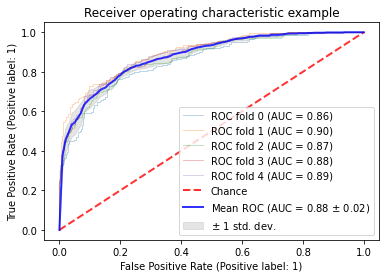

In [109]:
cv = StratifiedKFold(n_splits=5,random_state = 231,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X2, y2)):
    classifier.fit(X2[train], y2[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X2[test],
        y2[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

In [110]:
from sklearn.metrics import PrecisionRecallDisplay

#display = PrecisionRecallDisplay.from_estimator(
#    classifier, X_test, y_test, name="LinearSVC"
#)
#_ = display.ax_.set_title("2-class Precision-Recall curve")

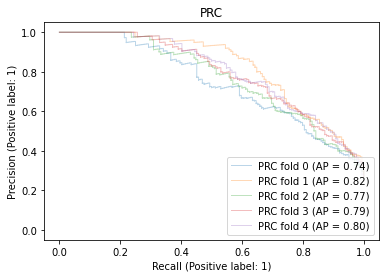

In [111]:
cv = StratifiedKFold(n_splits=5,random_state = 231,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X2, y2)):
    classifier.fit(X2[train], y2[train])
    viz = PrecisionRecallDisplay.from_estimator(
        classifier,
        X2[test],
        y2[test],
        name="PRC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    #interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    #interp_tpr[0] = 0.0
    #tprs.append(interp_tpr)
    #aucs.append(viz.roc_auc)



ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="PRC",
)
ax.legend(loc="lower right")
plt.show()

In [88]:
np.mean([0.83,0.86,0.84,0.82,0.79])

0.828

In [89]:
np.std([0.83,0.86,0.84,0.82,0.79])

0.023151673805580437

# Stack Models old


In [243]:
len(content_x)

15426

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
content_train0, content_test, content_y0, content_ytest =  train_test_split(content_x, label, test_size = 0.2,random_state=6)
content_train1, content_train2,content_ytr1, content_ytr2 =  train_test_split(content_train0,content_y0, test_size = 0.5,random_state=6)

In [114]:
content_classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6).fit(content_train1,content_ytr1)

In [115]:
content_input_x = content_classifier.predict_proba(content_train2)[:,1]

In [116]:
len(content_input_x)

1227

In [117]:
np.mean(content_ytr2)

0.26487367563162184

In [118]:
bib_train0, bib_test, bib_y0, bib_ytest =  train_test_split(bib_x, label, test_size = 0.2,random_state=6)
bib_train1, bib_train2, bib_ytr1, bib_ytr2 =  train_test_split(bib_train0,bib_y0, test_size = 0.5,random_state=6)

In [119]:
bib_classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6).fit(bib_train1,bib_ytr1)

In [120]:
bib_input_x = bib_classifier.predict_proba(bib_train2)[:,1]

In [121]:
len(bib_input_x)

1227

In [148]:
tag_train0, tag_test, tag_y0, tag_ytest =  train_test_split(tag_x, label, test_size = 0.2,random_state=6)
tag_train1, tag_train2,tag_ytr1, tag_ytr2 =  train_test_split(tag_train0,tag_y0, test_size = 0.5,random_state=6)

In [149]:
tag_classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6).fit(tag_train1,tag_ytr1)

/home/hzhuang/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [150]:
tag_input_x = tag_classifier.predict_proba(tag_train2)[:,1]

/home/hzhuang/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [151]:
np.mean(tag_ytr2)

0.26487367563162184

In [152]:
from sklearn.linear_model import LogisticRegression

In [153]:
XX = []

In [154]:
for ind,w in enumerate(content_input_x):
    XX.append([w,bib_input_x[ind], tag_input_x[ind]])

In [155]:
XX[0]

[0.22092615148801675, 0.24805000000000002, 0.11392748998690942]

In [156]:
from sklearn.metrics import average_precision_score

In [157]:
clf = LogisticRegression(random_state=0).fit(XX, tag_ytr2)
print(clf.classes_)
y_scores = clf.predict_proba(XX)[:,1]

[0 1]


In [158]:
clf.coef_

array([[1.20872999, 4.28765456, 4.73720546]])

In [159]:
average_precision_score(tag_ytr2, y_scores)

0.7835503330179284

In [160]:
from sklearn.metrics import roc_auc_score

#roc_auc_score(color_ytr2, y_scores)

In [161]:
content_input_test_x = content_classifier.predict_proba(content_test)[:,1]

In [162]:
bib_input_test_x = bib_classifier.predict_proba(bib_test)[:,1]

In [163]:
tag_input_test_x = tag_classifier.predict_proba(tag_test)[:,1]

/home/hzhuang/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [164]:
XXX = []

In [165]:
for ind,w in enumerate(content_input_test_x):
    XXX.append([w,bib_input_test_x[ind],tag_input_test_x[ind]])

In [166]:
y_scores = clf.predict_proba(XXX)[:,1]

In [170]:
roc_auc_score(tag_ytest, y_scores)

0.8671803762923008

In [168]:
roc_auc_score(content_ytest, y_scores)

0.8671803762923008

In [169]:
roc_auc_score(bib_ytest, y_scores)

0.8671803762923008

# Do data imputation

In [1]:
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay

In [3]:
web_features_use2 = []
bib_features_use2 = []
tag_features_use2 = []
label2 = []

In [4]:
web_features1 = []
web_features0 = []
tmp = []

for batch in range(0,100):
    with open('./labeled_journal_feature_2022/web_content_features_1_'+str(batch)+'.pkl', 'rb') as f:
        web_features1 += pickle.load(f)
        

    with open('./labeled_journal_feature_2022/web_content_features_0_'+str(batch)+'.pkl', 'rb') as f:
        web_features0 += pickle.load(f)

In [5]:
tag_features1 = []
tag_features0 = []

for batch in range(100):
    with open('./labeled_journal_feature_2022/web_tag_features_1_'+str(batch)+'.pkl', 'rb') as f:
        tag_features1 += pickle.load(f)

    with open('./labeled_journal_feature_2022/web_tag_features_0_'+str(batch)+'.pkl', 'rb') as f:
        tag_features0 += pickle.load(f)

In [6]:
labeled_journals = pd.read_csv('doaj_journal_list_urls_from_doaj_bing_v1.csv')

In [7]:
labeled_journals['ISSN'] = labeled_journals['ISSN'].apply(str.strip)

In [8]:
labeled_journals.shape

(15426, 11)

In [10]:
bibilometrics_after_average = pd.read_csv('doaj_bibilometrics_after_average.csv')

In [11]:
bib_features0 = []
bib_features_ind0 = []
counter = 0
for ind,row in labeled_journals[labeled_journals['Reason'] == 'Still in DOAJ index'].iterrows():
    if row['Journal_Title_Normalized'] in (bibilometrics_after_average['NormalizedName'].tolist()):
        tmp = bibilometrics_after_average.index[bibilometrics_after_average['NormalizedName']==row['Journal_Title_Normalized']]

        val = bibilometrics_after_average.iloc[tmp].drop(columns=['NormalizedName','Reason']).values.tolist()[0]
        #print(val)
        #print(len(val))
        bib_features0.append(val)
        bib_features_ind0.append(counter)
    else:
        bib_features0.append([-1]*18)
    counter += 1

In [12]:
bib_features1 = []
bib_features_ind1 = []
counter = 0
for ind,row in labeled_journals[labeled_journals['Reason'] != 'Still in DOAJ index'].iterrows():
    if row['Journal_Title_Normalized'] in (bibilometrics_after_average['NormalizedName'].tolist()):
        tmp = bibilometrics_after_average.index[bibilometrics_after_average['NormalizedName']==row['Journal_Title_Normalized']]
        #print(tmp)
        val = bibilometrics_after_average.iloc[tmp].drop(columns=['NormalizedName','Reason']).values.tolist()[0]
        #print(val)
        #print(len(val))
        bib_features1.append(val)
        bib_features_ind1.append(counter)
    else:
        bib_features1.append([-1]*18)
    counter += 1

In [13]:
len(web_features0)

12859

In [14]:
len(web_features0)+len(bib_features1)

15426

In [15]:
for ind,v in enumerate(zip(web_features0,bib_features0,tag_features0)):
    w = v[0]
    b = v[1]
    t = v[2]
    
    if len(b) == 18:
        bib_features_use2.append(b)
    else:
        bib_features_use2.append([-1]*18)
    if len(w) > 9:
        web_features_use2.append(w)
    else:
        web_features_use2.append([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 19473, -1, -1, -1, -1, -1,-1])
    
    if len(t) > 1:
        tag_features_use2.append(t)
    else:
        tag_features_use2.append('empty html tag')
        
        
    label2.append(0)

In [16]:
len(label2)

12859

In [17]:
for ind,v in enumerate(zip(web_features1,bib_features1,tag_features1)):
    w = v[0]
    b = v[1]
    t = v[2]

    if len(b) == 18:
        bib_features_use2.append(b)
    else:
        bib_features_use2.append([-1]*18)
    if len(w) > 9:
        web_features_use2.append(w)
    else:
        web_features_use2.append([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 19473, -1, -1, -1, -1, -1,-1])
    if len(t) > 1:
        tag_features_use2.append(t)
    else:
        tag_features_use2.append('empty html tag')
        
        
    label2.append(1)

In [18]:
len(label2)

15426

In [19]:
vectorizer = TfidfVectorizer()

In [20]:
tag_x2 = vectorizer.fit_transform(tag_features_use2).todense()

In [21]:
pickle.dump(vectorizer, open('tag_tfidf_curr', 'wb'))

In [22]:
X2 = []

In [23]:
len(tag_x2[0].tolist()[0])

640

In [24]:
len(w),len(bib_features_use2[ind])

(8, 18)

In [93]:
len(bib_features_use2[0])

18

In [25]:
for ind,w in enumerate(web_features_use2):
    tmp = w+bib_features_use2[ind]+tag_x2[ind].tolist()[0]
    #print(len(tmp))
    #print(len(bib_features_use2[ind]))
    X2.append(tmp)

In [80]:
[xx[0:16] for xx in X2]

[[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 19473, -1, -1, -1, -1, -1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10555.0, 31, -1, -1, 1, 1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 19473, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 19473, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 19473, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 19473, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 19473, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 19473, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 19473, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 19473, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 7076.857142857143, 28, -1, -1, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19473, 2, 1, 1, 1, 1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 19473, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 19473, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -

In [26]:
len(X2[0])

675

In [27]:
len(X2)

15426

In [28]:
X3 = np.array(X2)
y3 = np.array(label2)

In [29]:
len(web_features_use2)

15426

In [30]:
len(X2)

15426

In [31]:
X3[0]

array([-1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00,  1.94730000e+04, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00,  2.01200000e+03,  2.33333333e-01,  3.60000000e+02,
        5.72222222e-01,  2.77777778e-03,  5.00000000e-02,  2.77777778e-03,
        1.63055556e+00,  1.97222222e-01,  5.55555556e-03,  8.19444444e-01,
        1.11197917e+00,  1.75903614e+00,  3.01323024e+00,  5.55555556e-01,
        1.30555556e-01,  1.97222222e-01,  1.72222222e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [32]:
np.mean(y3)

0.166407364190328

In [33]:
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6)

In [34]:
classifier.fit(X3,y3)

RandomForestClassifier(max_depth=20, n_estimators=500, n_jobs=6, random_state=0)

In [35]:
pickle.dump(classifier, open('all_features_imputed_randomforest', 'wb'))

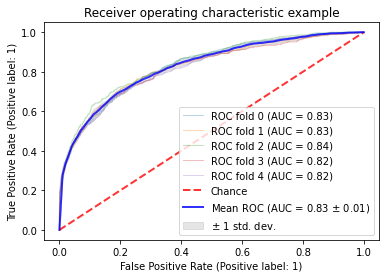

In [36]:
cv = StratifiedKFold(n_splits=5,random_state = 231,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X3, y3)):
  
    classifier.fit(X3[train], y3[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X3[test],
        y3[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

In [37]:
set(y3)

{0, 1}

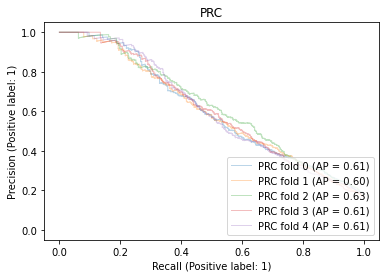

In [38]:
cv = StratifiedKFold(n_splits=5,random_state = 231,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X3, y3)):
    classifier.fit(X3[train], y3[train])
    viz = PrecisionRecallDisplay.from_estimator(
        classifier,
        X3[test],
        y3[test],
        name="PRC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    #interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    #interp_tpr[0] = 0.0
    #tprs.append(interp_tpr)
    #aucs.append(viz.roc_auc)



ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="PRC",
)
ax.legend(loc="lower right")
plt.show()

In [39]:
np.mean([0.61,0.60,0.63,0.61,0.61])

0.6119999999999999

In [40]:
np.std([0.61,0.60,0.63,0.61,0.61])

0.00979795897113272

In [50]:
np.mean([0.85,0.85,0.85,0.85,0.85])

0.852

In [52]:
np.std([0.85,0.85,0.85,0.85,0.85])

0.0040000000000000036

In [48]:
from sklearn.feature_selection import RFECV

In [103]:
X4 = np.array(X2)[:,:35]
y4 = np.array(label2)

In [104]:
estimator = RandomForestClassifier(max_depth=3,n_estimators = 500, random_state=0,n_jobs=6)

In [105]:
selector = RFECV(estimator, step=1, cv=5,min_features_to_select=5)

In [106]:
selector = selector.fit(X4, y4)

In [107]:
selector.support_

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False,  True, False, False, False])

In [112]:
X4[0]

array([-1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00,  1.94730000e+04, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00,  2.01200000e+03,  2.33333333e-01,  3.60000000e+02,
        5.72222222e-01,  2.77777778e-03,  5.00000000e-02,  2.77777778e-03,
        1.63055556e+00,  1.97222222e-01,  5.55555556e-03,  8.19444444e-01,
        1.11197917e+00,  1.75903614e+00,  3.01323024e+00,  5.55555556e-01,
        1.30555556e-01,  1.97222222e-01,  1.72222222e-01])

In [109]:
len(selector.support_[17:])

18

In [110]:
bibilometrics_after_average.columns[2:][selector.support_[17:]]

Index(['journal_year_first_publish', 'journal_num_author_self_reference',
       'journal_avg_middle_author_hindex', 'journal_num_author_cited'],
      dtype='object')

# Stack Model with model imputation

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
web_features1 = []
web_features0 = []
content_x = []
content_found = []
label = []
for batch in range(0,100):
    with open('./labeled_journal_feature_2022/web_content_features_0_'+str(batch)+'.pkl', 'rb') as f:
        web_features0 += pickle.load(f)

label += [1] * len(web_features0)
counter = 0
for ind,wf in enumerate(web_features0):
    if len(wf) <9:
        content_x.append([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 19473, -1, -1, -1, -1, -1,-1,counter,0])
    else:
        content_x.append([wf,counter,0])
        content_found.append(counter)
    counter += 1

        
for batch in range(0,100):
    with open('./labeled_journal_feature_2022/web_content_features_1_'+str(batch)+'.pkl', 'rb') as f:
        web_features1 += pickle.load(f)
        
label += [0] * len(web_features1)
for ind,wf in enumerate(web_features1):
    if len(wf) <9:
        content_x.append([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 19473, -1, -1, -1, -1, -1,-1,counter,1])
    else:
        content_x.append([wf,counter,1])
        content_found.append(counter)
    counter += 1


In [5]:
len(content_x),len(label)

(15426, 15426)

In [6]:
tag_features1 = []
tag_features0 = []
tag_x = []
tag_found = []
labels = []

counter = 0

for batch in range(100):
    with open('./labeled_journal_feature_2022/web_tag_features_0_'+str(batch)+'.pkl', 'rb') as f:
        tag_features0 += pickle.load(f)
        
for ind,wf in enumerate(tag_features0):
    if len(wf) <1:
        tag_x.append(['empty html tag',0])
    else:
        tag_x.append([wf])
        tag_found.append(counter)
        
    tag_x[-1].append(counter)
    tag_x[-1].append(0)
    counter += 1
    
labels += [0] * len(tag_features0)

for batch in range(100):
    with open('./labeled_journal_feature_2022/web_tag_features_1_'+str(batch)+'.pkl', 'rb') as f:
        tag_features1 += pickle.load(f)


for ind,wf in enumerate(tag_features1):
    if len(wf) <1:
        tag_x.append(['empty html tag',1])
    else:
        tag_x.append([wf])
        tag_found.append(counter)
        
    tag_x[-1].append(counter)
    tag_x[-1].append(1)
    counter += 1
        


labels += [1] * len(tag_features1)    

In [7]:
labels.index(1)

12859

In [8]:
labeled_journals = pd.read_csv('doaj_journal_list_urls_from_doaj_bing_v1.csv')

In [9]:
labeled_journals

,Unnamed: 0,Journal_Title_Normalized,added,Journal Title,ISSN,Remove_Date,Add_Date,Reason,Data Source,URL,reason_category
0,0,"#tear: revista de educação, ciência e tecnologia",True,"#Tear: Revista de Educação, Ciência e Tecnologia",2238-8079,1677-09-22,2015-07-20,Still in DOAJ index,DOAJ,https://periodicos.ifrs.edu.br/index.php/tear/...,interesting reason
1,1,(en)clave comahue,True,(En)clave Comahue,2545-6466,1677-09-22,2019-05-13,Still in DOAJ index,DOAJ,http://revele.uncoma.edu.ar/htdoc/revele/index...,interesting reason
2,2,(پژوهش حسابداری و حسابرسی (پیوسته,True,(پژوهش حسابداری و حسابرسی (پیوسته,2676-7554,1677-09-22,2020-05-25,Still in DOAJ index,DOAJ,https://ijar.alzahra.ac.ir/,interesting reason
3,3,100-cs,True,100-Cs,0719-5737,1677-09-22,2018-12-27,Still in DOAJ index,DOAJ,http://100cs.cl/,interesting reason
4,4,1616,True,1616,0210-7287,1677-09-22,2020-03-09,Still in DOAJ index,DOAJ,http://revistas.usal.es/index.php/1616_Anuario...,interesting reason
...,...,...,...,...,...,...,...,...,...,...,...
15421,15436,силовое и энергетическое оборудование: автоном...,False,Силовое и энергетическое оборудование: Автоном...,2618-8716,2020-11-19,1677-09-22,Website URLs have security issues,DOAJ,https://onlinebooks.library.upenn.edu/webbin/b...,interesting reason
15422,15437,українська біографістика,False,Українська біографістика,2520-2855,2021-02-11,1677-09-22,Journal not adhering to best practice,DOAJ,http://ub.nbuv.gov.ua/,interesting reason
15423,15438,экономика региона,False,Экономика региона,2072-6414,2021-03-01,1677-09-22,Journal not adhering to Best practice,DOAJ,https://economyofregion.ru/,interesting reason
15424,15439,اندیشه‌های نوین تربیتی,False,اندیشه‌های نوین تربیتی,2476-7654,2022-06-09,1677-09-22,Journal not adhering to Best practice,DOAJ,http://ensani.ir/fa/article/journal/65/%D8%A7%...,interesting reason


In [10]:
bibilometrics_after_average = pd.read_csv('doaj_bibilometrics_after_average.csv')

In [11]:
bib_features = []
bib_features_found = []
counter = 0
labels = [] 
for ind,row in labeled_journals.iterrows():
    
    if row['Reason'] == 'Still in DOAJ index':
        label = 0
    else:
        label = 1
    
    if row['Journal_Title_Normalized'] in (bibilometrics_after_average['NormalizedName'].tolist()):
        tmp = bibilometrics_after_average.index[bibilometrics_after_average['NormalizedName']==row['Journal_Title_Normalized']]
        #print(tmp)
        val = bibilometrics_after_average.iloc[tmp].drop(columns=['NormalizedName','Reason']).values.tolist()[0]
        #print(val)
        #print(len(val))
        bib_features.append(val+[ind]+[label])
        bib_features_found.append(ind)
    else:
        bib_features.append([-1]*18+[ind]+[label])
    
    labels.append(label)
    
    counter += 1

In [12]:
bib_features[:10]

[[2012.0,
  0.2333333333333333,
  360.0,
  0.5722222222222222,
  0.0027777777777777,
  0.05,
  0.0027777777777777,
  1.6305555555555555,
  0.1972222222222222,
  0.0055555555555555,
  0.8194444444444444,
  1.1119791666666667,
  1.7590361445783131,
  3.013230240549828,
  0.5555555555555556,
  0.1305555555555555,
  0.1972222222222222,
  0.1722222222222222,
  0,
  0],
 [-1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  1,
  0],
 [-1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  2,
  0],
 [-1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  3,
  0],
 [-1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  4,
  0],
 [-1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  5,
  0],
 [-1,
  -1,
  -1,
  -1,
  -1,
  -1,
  

In [13]:
labels.index(1)

12859

In [14]:
len(content_x),len(tag_x),len(bib_features)

(15426, 15426, 15426)

In [15]:
tag_x[15425]

['html head meta meta meta title link meta meta meta link link link link link link link link link link link link link link link link link link link link script script script script link body header div div div div div a div ul li a i li a i ul li a span div div div a img h1 div div div div div div div div div input label form div input input button span div input label a div input label a div p a p a p a p a p a p a div input label a div p a p a p a p a p a p a p a p a p a div input label a div input label a div input label a div input label a div section article div h5 a strong div article div h5 a strong div article div h5 strong i div div div a i small div a i small div article div h5 strong i div div article div h5 strong i div div article div h5 strong i div div article div h5 strong i div div article div h5 strong i div div article div h5 strong i div div article div h5 strong i div div article div h5 strong i div div article div h5 strong i div div div table caption tbody tr td 

In [16]:
all_x = []
for ind,xx in enumerate(content_x):
    vec = [xx,tag_x[ind],bib_features[ind]]
    
    if xx[-1] != bib_features[ind][-1] or xx[-1] != tag_x[ind][-1]:
        print(xx[-1],bib_features[ind][-1])
        print(ind)
        break
    all_x.append(vec)

In [17]:
stack_train0, stack_test, stack_y0, stack_ytest =  train_test_split(all_x, labels, test_size = 0.2,random_state=6)
stack_train1, stack_test1, stack_y1, stack_ytest1 =  train_test_split(stack_train0, stack_y0, test_size = 0.2,random_state=6)

In [18]:
stack_y1

[0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [19]:
content_train0 = [] 
content_y0 = []
for ind,vec in enumerate(stack_train1):
    xx = vec[0]
    if xx[-2] in content_found:
        content_train0.append(xx[:-2][0])
        content_y0.append(xx[-1])
content_classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6).fit(content_train0,content_y0)

In [20]:
content_train1 = [] 
content_y1 = []
for ind,vec in enumerate(stack_test1):
    xx = vec[0]
    if xx[-2] in content_found:
        content_train1.append(xx[:-2][0])
        content_y1.append(xx[-1])

In [21]:
content_test = [] 
content_ytest = []
for ind,vec in enumerate(stack_test):
    xx = vec[0]
    if xx[-2] in content_found:
        content_test.append(xx[:-2][0])
    content_ytest.append(xx[-1])

In [22]:
content_input_x = content_classifier.predict_proba(content_train1)[:,1]

In [23]:
content_input_x2 = content_classifier.predict_proba(content_test)[:,1]

In [24]:
content_input_x

array([0.0688519 , 0.34929125, 0.34514151, ..., 0.06388446, 0.20895303,
       0.17108631])

In [25]:
np.mean(content_input_x2)

0.18650459104967324

In [26]:
len(content_input_x),len(content_input_x2)

(1718, 2137)

In [27]:
content_input_xx = []
counter = 0
for ind,vec in enumerate(stack_test1):
    xx = vec[0]
    if xx[-2] in content_found:
        content_input_xx.append(content_input_x[counter])
        counter += 1
    else:
        content_input_xx.append(-1)

In [28]:
content_input_xx

[0.06885190476190477,
 0.3492912533861186,
 -1,
 0.3451415064246558,
 -1,
 0.0440905737704918,
 0.09827685203286798,
 0.22364247152671216,
 0.024328172800593306,
 0.05403404255319149,
 -1,
 -1,
 0.12915384932578033,
 -1,
 -1,
 0.001645644212983541,
 0.5338262978388647,
 0.029494525405678294,
 0.038565904548295525,
 0.014619920006365786,
 -1,
 -1,
 0.1881783378272109,
 0.3451415064246558,
 0.053063230545856606,
 -1,
 0.12052557401166257,
 0.12884485976796076,
 -1,
 -1,
 0.17744467997076857,
 0.08567565125219431,
 0.11723366385169671,
 -1,
 0.11820525256529153,
 0.3451415064246558,
 0.3451415064246558,
 -1,
 0.06933161257347303,
 -1,
 -1,
 0.3451415064246558,
 -1,
 -1,
 0.4956094358426615,
 0.09494827706285075,
 0.6548300156841622,
 0.09697326344774226,
 -1,
 0.3451415064246558,
 0.08598501213676107,
 0.3544755809597245,
 0.05190084763944604,
 0.19258268394133493,
 0.3451415064246558,
 0.19873852813852816,
 0.001000921429312718,
 0.033394108567521896,
 0.20916658600029236,
 0.34514150642

In [29]:
content_input_xx2 = []
counter = 0
content_y_test = []
for ind,vec in enumerate(stack_test):
    xx = vec[0]
    if xx[-2] in content_found:
        content_input_xx2.append(content_input_x2[counter])
        counter += 1
    else:
        content_input_xx2.append(-1)
    
    content_y_test.append(stack_ytest[ind])

In [30]:
from sklearn.metrics import average_precision_score

In [31]:
average_precision_score(content_y0, content_classifier.predict_proba(content_train0)[:,1])

0.7290076054786226

In [32]:
average_precision_score(content_y1, content_classifier.predict_proba(content_train1)[:,1])

0.34779450825173747

In [33]:
len(tag_x)

15426

In [34]:
tag_train0 = [] 
tag_y0 = []
for ind,vec in enumerate(stack_train1):
    xx = vec[1]
    if ind in tag_found:
        tag_train0.append(xx[0])
        tag_y0.append(xx[-1])

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
vectorizer = TfidfVectorizer()

In [37]:
tag_train0 = vectorizer.fit_transform(tag_train0)

In [38]:
tag_classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6).fit(tag_train0,tag_y0)

In [39]:
tag_train1 = [] 
tag_y1 = []
for ind,vec in enumerate(stack_test1):
    xx = vec[1]
    if ind in tag_found:
        tag_train1.append(xx[0])
        tag_y1.append(xx[-1])

In [40]:
tag_train1[0]

'html head meta meta meta base meta meta meta title link link link link link link link link link link link link script script script script script script script script script body div div div div div div div div i header div div div div a img section div div div div nav ul li a span span li a span span li a span span li a span span li a span span li a span span li a span span li div span span span ul li div div ul li a span li a span span li a span span li a span span li a span span main div div div div div div div div div div div meta div h2 div h3 p strong strong p strong em ul li p li p li p li p li li p li p p div div div div h4 div h4 a img a img h5 p strong br strong br br hr p a img strong br p a img hr p a img div div div div div h3 div p ul li p a li a li p a li p a li p a li p a li p a li p a li p a li p a li p a li p a li p a li p a li a li p a li p a li p a li p a li a p strong a div div div div div h3 div p img img div div div div div h3 div p p img p p img p p img p p img

In [41]:
tag_test = [] 
tag_ytest = []
for ind,vec in enumerate(stack_test):
    xx = vec[1]
    if xx[-2] in tag_found:
        tag_test.append(xx[0])
    tag_ytest.append(xx[-1])

In [42]:
xx

['html head meta meta meta title link link link link link link link link script script script script script script script script script link meta body div div div a img div h3 br span nav div button span span span span div ul li a span li a span li a span li a span li a span li a span li a span li a span div div div div h3 div div h3 hr ul li a li a li a li a li a li a div div h1 div div div div h4 a div div p p p a div div div h4 a div ul li i a a a a a div p p p a div div div h4 a div ul li i a a a div p p p a div div div h4 a div ul li i a a a a a div p p p a div div div h4 a div ul li i a a a div p p p a div div div h4 a div ul li i a a a div p p p a div div div h4 a div ul li i a a a div p p p a div div div h4 a div ul li i a a a a div p p p a div div div h4 a div ul li i a a a a div p p p a div div div h4 a div ul li i a a a a a div p p p a ul li span li span li a li a div div form div label input input button i div div div div div p a p a script',
 4674,
 0]

In [43]:
tag_train1 = vectorizer.transform(tag_train1)

In [44]:
tag_input_x = tag_classifier.predict_proba(tag_train1)[:,1]

In [45]:
tag_test = vectorizer.transform(tag_test)

In [46]:
tag_input_x2 = tag_classifier.predict_proba(tag_test)[:,1]

In [47]:
tag_input_xx = []
counter = 0
for ind,vec in enumerate(stack_test1):
    xx = vec[1]
    if ind in tag_found:
        tag_input_xx.append(tag_input_x[counter])
        counter += 1
    else:
        tag_input_xx.append(-1)

In [48]:
tag_input_xx

[0.14920223816574366,
 0.10632018210598672,
 0.11395466581006652,
 0.24008707361107845,
 0.3070471395975132,
 0.15690027174100932,
 0.041069129174494665,
 0.15978964421257838,
 0.0635326481782538,
 0.050886714158796656,
 0.10408313073974469,
 0.11258399904412454,
 0.09763817010719616,
 0.10205071592904508,
 0.1435097622637998,
 0.18180198271010553,
 0.06164136798704202,
 0.06875850172018302,
 0.04726003193415204,
 0.1029091533143694,
 0.09487936103386595,
 0.07018619023717311,
 0.07382806373882925,
 0.42925843493769894,
 0.0517925718194991,
 0.06519287016771406,
 0.11484773485336695,
 0.08288427014495105,
 0.10345100252129007,
 0.08093490818560253,
 0.10051302900079288,
 0.31114405005755863,
 0.17066895559776935,
 0.2452310269345835,
 0.08673838188301648,
 0.032520844398799015,
 0.7986790129934279,
 0.12264669087171597,
 0.0292118241338455,
 0.15258892523865913,
 0.1435097622637998,
 0.21342520493006933,
 0.15594144762225534,
 0.735554411487404,
 0.2863594414437805,
 0.0211822141972565

In [49]:
tag_input_xx2 = []
counter = 0
tag_y_test = []
for ind,vec in enumerate(stack_test):
    xx = vec[1]
    if xx[-2] in tag_found:
        tag_input_xx2.append(tag_input_x2[counter])
        counter += 1
    else:
        tag_input_xx2.append(-1)
        
    tag_y_test.append(stack_ytest[ind])

In [50]:
tag_input_xx2

[0.08143460377894667,
 0.13068577050777194,
 0.0810426919425644,
 0.07564185144511755,
 0.10506425833457261,
 0.27328479580709913,
 0.010355010421896583,
 0.12890706880075442,
 0.09709058819704468,
 0.1190205681402329,
 0.35917367944530504,
 0.2964934278609493,
 0.17058250031478941,
 0.12461784904937048,
 0.22675762612464112,
 0.1346229491822362,
 0.2131360677560466,
 0.9999770114942528,
 0.09660773032397463,
 0.06944766498964933,
 0.13301575307754993,
 0.08534489285084465,
 0.11614682631053105,
 0.10459977556882023,
 0.9871872443221317,
 0.08536143503194654,
 0.07033538512533967,
 0.004609134705140472,
 0.14917533566402075,
 0.1721779447481032,
 0.25527033806667343,
 0.05316689536854172,
 0.49880105295453514,
 0.08195023235403362,
 0.11099277055334707,
 0.1435097622637998,
 0.5032851680889197,
 0.044804078782570325,
 0.1894609861992194,
 0.13402745020884355,
 0.3587098034218122,
 0.4082699939376879,
 0.08749276630274777,
 0.19822851940195063,
 0.07514944408632528,
 0.2222354431656497,

In [51]:
average_precision_score(tag_y0, tag_classifier.predict_proba(tag_train0)[:,1])

0.9522997891868048

In [52]:
average_precision_score(tag_y1, tag_classifier.predict_proba(tag_train1)[:,1])

0.5890634520779229

In [53]:
len(bib_features)

15426

In [54]:
bib_train0 = [] 
bib_y0 = []
for ind,vec in enumerate(stack_train1):
    xx = vec[2]
    if xx[-2] in bib_features_found:
        bib_train0.append(xx[:-2])
        bib_y0.append(xx[-1])

In [55]:
xx

[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 10119,
 0]

In [56]:
bib_train0

[[2014.0,
  7.318181818181818,
  308.0,
  26.57792207792208,
  0.3019480519480519,
  1.7467532467532467,
  0.224025974025974,
  6.542207792207792,
  1.775974025974026,
  0.4707792207792208,
  33.54545454545455,
  7.460483870967742,
  6.478448275862069,
  7.370468948035487,
  13.821428571428571,
  3.1103896103896105,
  1.775974025974026,
  4.740259740259741],
 [2012.0,
  1.270440251572327,
  159.0,
  12.075471698113208,
  0.0125786163522012,
  0.5974842767295597,
  0.0125786163522012,
  1.3333333333333333,
  1.2641509433962264,
  0.0188679245283018,
  31.38993710691824,
  1.5288508830762353,
  3.6,
  4.3068910256410255,
  4.534591194968553,
  1.0943396226415094,
  1.2641509433962264,
  2.779874213836478],
 [1993.0,
  1.175,
  520.0,
  0.1442307692307692,
  0.0,
  0.2865384615384615,
  0.0,
  0.7596153846153846,
  0.0153846153846153,
  0.0,
  0.173076923076923,
  0.0,
  2.5906040268456376,
  2.611111111111111,
  1.1884615384615385,
  0.4038461538461538,
  0.0153846153846153,
  0.01730769

In [57]:
bib_y0

[0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,


In [58]:
bib_classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6).fit(bib_train0,bib_y0)

In [59]:
bib_train1 = [] 
bib_y1 = []
for ind,vec in enumerate(stack_test1):
    xx = vec[2]
    if xx[-2] in bib_features_found:
        bib_train1.append(xx[:-2])
        bib_y1.append(xx[-1])

In [60]:
tag_y1

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,


In [61]:
bib_y1

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,


In [62]:
bib_train1

[[2015.0,
  0.6019417475728155,
  103.0,
  7.990291262135922,
  0.0097087378640776,
  0.3592233009708738,
  0.0097087378640776,
  2.9805825242718447,
  0.8252427184466019,
  0.1650485436893204,
  18.009708737864077,
  3.134920634920635,
  3.739130434782609,
  4.91263440860215,
  1.7475728155339805,
  0.7378640776699029,
  0.8252427184466019,
  3.7864077669902914],
 [1998.0,
  6.007299270072993,
  274.0,
  29.83211678832117,
  0.2226277372262773,
  1.4233576642335766,
  0.2043795620437956,
  2.656934306569343,
  1.1751824817518248,
  0.2554744525547445,
  31.072992700729927,
  4.459199134199134,
  4.595238095238095,
  4.7018698578908005,
  10.60948905109489,
  2.978102189781022,
  1.1751824817518248,
  4.532846715328467],
 [2014.0,
  3.795275590551181,
  127.0,
  12.299212598425196,
  0.1574803149606299,
  1.015748031496063,
  0.1732283464566929,
  3.795275590551181,
  1.251968503937008,
  0.2913385826771653,
  18.566929133858267,
  5.116666666666667,
  3.65,
  5.417961165048545,
  7.23

In [63]:
np.mean(bib_y1)

0.25120772946859904

In [64]:
bib_test = [] 
bib_ytest = []
for ind,vec in enumerate(stack_test):
    xx = vec[2]
    if xx[-2] in bib_features_found:
        bib_test.append(xx[:-2])
    bib_ytest.append(xx[-1])

In [65]:
bib_input_x = bib_classifier.predict_proba(bib_train1)[:,1]

In [66]:
average_precision_score(bib_y0, bib_classifier.predict_proba(bib_train0)[:,1])

0.9999971895270536

In [67]:
average_precision_score(bib_y1, bib_input_x)

0.6407319393799108

In [68]:
bib_input_xx = []
counter = 0

for ind,vec in enumerate(stack_test1):
    xx = vec[2]
    if ind in bib_features_found:
        bib_input_xx.append(bib_input_x[counter])
        counter += 1
    else:
        bib_input_xx.append(-1)
    
    

In [69]:
bib_input_xx

[0.16903229993251864,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0.208,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0.124,
 -1,
 -1,
 0.293436124615816,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0.22976138006929567,
 0.076,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0.25148720423488313,
 -1,
 -1,
 -1,
 0.13794415048419126,
 -1,
 0.16897295531266943,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0.004,
 -1,
 0.156,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0.5707748596089154,
 -1,
 0.28,
 -1,
 -1,
 -1,
 -1,
 0.1965650432709597,
 -1,
 -1,
 0.7355850340136055,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0.02,
 -1,
 -1,
 -1,
 -1,
 0.4259183673469388,
 -1,
 -1,
 -1,
 -1,
 0.128,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0.31624992912458316,
 -1,
 -1,
 -1,
 0.44216107382550335,
 -1,
 -1,
 -1,
 0.4580506329113924,
 -1,
 -1,
 -1,
 -1,
 -1,
 0.332,
 -1,
 -1,
 -1,
 0.02,
 0.13741993802997882,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -

In [70]:
bib_input_x2 = bib_classifier.predict_proba(bib_test)[:,1]

In [71]:
bib_input_xx2 = []
counter = 0
bib_y_test = []
for ind,vec in enumerate(stack_test):
    xx = vec[2]
    if xx[-2] in bib_features_found:
        bib_input_xx2.append(bib_input_x2[counter])
        counter += 1
    else:
        bib_input_xx2.append(-1)
        
    bib_y_test.append(stack_ytest[ind])

In [72]:
bib_input_xx2

[-1,
 0.016,
 -1,
 0.204,
 -1,
 0.41818666666666665,
 -1,
 -1,
 0.2799663318361236,
 -1,
 0.42259555984555985,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0.5608690476190475,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0.346,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0.112,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0.11642181818181818,
 -1,
 -1,
 -1,
 0.22850727506929636,
 -1,
 0.20361110888155365,
 0.3465589430894309,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0.022,
 -1,
 0.6799,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0.274737875034775,
 0.02,
 -1,
 -1,
 -1,
 0.2785666666666667,
 0.3447327945062041,
 -1,
 -1,
 0.304,
 0.13823529411764707,
 -1,
 -1,
 0.024,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0.7543193277310924,
 -1,
 -1,
 -1,
 -1,
 -1,
 0.38393650793650796,
 -1,
 0.22289624178239392,
 -1,
 -1,
 0.146,
 -1,
 0.1584571348164031,
 -1,
 -1,
 -1,
 0.4336150022492128,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0.2889378022213311,
 0.816,
 0.3621254120148857,
 -1,
 -1,
 0.20882248857202226,
 -1,
 -1,

In [73]:
len(content_input_xx),len(stack_test1)

(2468, 2468)

In [74]:
for zp in zip(content_y_test,tag_y_test,bib_y_test):

    if not (zp[0] == zp[1] and zp[1] == zp[2]):
        print('wrong')
   

In [75]:
len(content_y1),len(tag_y1),len(bib_y1)

(1718, 2464, 621)

In [76]:
XX = []
y = []
for ind,w in enumerate(stack_test1):
    vec = [content_input_xx[ind],tag_input_xx[ind],bib_input_xx[ind]]
    
    XX.append(vec)
    y.append(stack_y1[ind])

In [77]:
len(y)

2468

In [78]:
XX[0:500]

[[0.06885190476190477, 0.14920223816574366, 0.16903229993251864],
 [0.3492912533861186, 0.10632018210598672, -1],
 [-1, 0.11395466581006652, -1],
 [0.3451415064246558, 0.24008707361107845, -1],
 [-1, 0.3070471395975132, -1],
 [0.0440905737704918, 0.15690027174100932, -1],
 [0.09827685203286798, 0.041069129174494665, -1],
 [0.22364247152671216, 0.15978964421257838, -1],
 [0.024328172800593306, 0.0635326481782538, -1],
 [0.05403404255319149, 0.050886714158796656, 0.208],
 [-1, 0.10408313073974469, -1],
 [-1, 0.11258399904412454, -1],
 [0.12915384932578033, 0.09763817010719616, -1],
 [-1, 0.10205071592904508, -1],
 [-1, 0.1435097622637998, -1],
 [0.001645644212983541, 0.18180198271010553, -1],
 [0.5338262978388647, 0.06164136798704202, -1],
 [0.029494525405678294, 0.06875850172018302, -1],
 [0.038565904548295525, 0.04726003193415204, 0.124],
 [0.014619920006365786, 0.1029091533143694, -1],
 [-1, 0.09487936103386595, -1],
 [-1, 0.07018619023717311, 0.293436124615816],
 [0.1881783378272109,

In [110]:
stack_classifier = RandomForestClassifier(max_depth=1,n_estimators = 5, random_state=0,n_jobs=6).fit(XX,y)

In [111]:
clf = LogisticRegression(random_state=0).fit(XX, y)

In [112]:
clf.score(XX,y)

0.8350891410048622

In [113]:
stack_classifier.score(XX,y)

0.8350891410048622

In [114]:
XX2 = []
y2 = []
for ind,w in enumerate(stack_test):
    vec = [content_input_xx2[ind],tag_input_xx2[ind],bib_input_xx2[ind]]
    
    XX2.append(vec)
    y2.append(stack_ytest[ind])

In [115]:
for zp in zip(y2,bib_y_test):
    if not (zp[0] == zp[1]):
        print(zp)
        print('wrong')
        break

In [116]:
len(content_y_test),len(y2)

(3086, 3086)

In [117]:
for zp in zip(content_y_test,y2):

    if not (zp[0] == zp[1]):
        print('wrong')

In [118]:
stack_classifier.score(XX2,y2)

0.837653920933247

In [119]:
stack_classifier

RandomForestClassifier(max_depth=1, n_estimators=5, n_jobs=6, random_state=0)

In [120]:
average_precision_score(content_y_test, stack_classifier.predict_proba(XX2)[:,1])

0.20940124713703837

In [121]:
def check_three(vec):
    for x in vec:
        if x > 0.5:
            return x
        
    return np.max(vec)

In [109]:
average_precision_score(content_y_test, stack_classifier.predict_proba(XX2)[:,1])

0.3185689065296977

In [108]:
average_precision_score(content_y_test, [check_three (x) for x in XX2])

0.5219902305925342

In [103]:
average_precision_score(content_y_test, [x[0] for x in XX2])

0.293575896573416

In [104]:
average_precision_score(content_y_test, [x[0] for x in XX2])

0.293575896573416

In [105]:
average_precision_score(content_y_test, [x[1] for x in XX2])

0.55780955761487

In [106]:
average_precision_score(content_y_test, [x[2] for x in XX2])

0.3336817309836239

In [102]:
average_precision_score(content_y_test, clf.predict_proba(XX2)[:,1])

0.203704818303588

In [114]:
roc_auc_score(content_y_test, stack_classifier.predict_proba(XX2)[:,1])

0.5437345811278796

In [325]:
len(bib_features_found)

3741

In [391]:
for ind,w in enumerate(stack_test1):
    print(w[-1])

3062
1965
8209
684
14080
10656
8043
4586
3939
222
12005
592
7577
3003
1255
11614
12230
5816
4967
2751
11829
9442
10536
12887
5678
11156
10430
11409
2558
94
4151
3029
6518
10305
5304
3417
13794
2359
3386
10903
13929
6153
5174
14982
13200
11489
15259
7821
7563
4340
3623
3048
3196
9391
15286
13364
3579
473
5544
265
8328
11342
15093
1012
9457
4129
1897
5004
14564
7701
13277
13300
3686
12494
12852
8495
5815
10574
2130
13772
7721
4469
14788
4572
13676
384
8724
7127
9420
10766
6225
3454
988
10163
6877
1753
2680
12071
5933
9248
5308
13039
11945
3522
9769
1878
14113
15289
7994
2180
287
5144
9671
1988
10505
206
2482
7550
6564
14892
12807
4686
11877
12354
4447
14919
7356
15051
14122
4428
7357
218
6341
11094
14107
1654
14383
5710
1542
9135
14368
13740
2225
4553
3655
9955
1930
2611
5569
6987
10474
2963
12682
3897
10056
4877
7391
2691
5059
3787
14776
8319
3599
6667
3559
3814
1669
14435
11799
3909
6163
15080
6949
13038
14899
11825
8501
11190
422
3198
8067
8253
13109
13923
1411
1500
3487
1003
4642
274

In [392]:
len(stack_test1)

2468